# **Bank Marketing Campaign Analysis**

## **📖 Introduction**
Marketing campaigns are crucial for financial institutions to attract new customers and increase engagement. This project analyzes the **Bank Marketing Dataset**, which contains information about a past marketing campaign of a financial institution. The goal is to **identify patterns and key factors that influenced customer responses** to improve future marketing strategies.

## **📊 About the Dataset**
This dataset was originally sourced from the **UCI Machine Learning Repository**. It includes details of a **direct marketing campaign** conducted via phone calls to promote term deposits. The dataset contains customer demographic details, financial attributes, and campaign-related data.

### **📌 Dataset Columns**
- **Demographic Information:**
  - `age` → Customer’s age  
  - `job` → Type of job (e.g., admin, technician, services, etc.)  
  - `marital` → Marital status (single, married, divorced)  
  - `education` → Education level (primary, secondary, tertiary, unknown)  

- **Financial Information:**
  - `balance` → Account balance in euros  
  - `default` → Credit default status (`yes` or `no`)  
  - `housing` → Has a housing loan (`yes` or `no`)  
  - `loan` → Has a personal loan (`yes` or `no`)  

- **Campaign Data:**
  - `contact` → Contact communication type (e.g., cellular, telephone, unknown)  
  - `month` → Last contact month  
  - `day` → Last contact day  
  - `duration` → Call duration in seconds  
  - `campaign` → Number of contacts during this campaign  
  - `pdays` → Days since last contact (-1 means never contacted before)  
  - `previous` → Number of times contacted before  
  - `poutcome` → Outcome of the previous marketing campaign (success, failure, unknown)  

- **Target Variable:**
  - `deposit` → Whether the client subscribed to a term deposit (`yes` or `no`)  

## **Project Objective**
The primary goal of this analysis is to explore **customer behavior and campaign effectiveness** to answer key questions:  
1. **Who are the customers most likely to subscribe?** (based on age, job, balance, etc.)  
2. **What factors influence subscription rates?** (call duration, previous campaign outcomes, etc.)  
3. **When is the best time to contact customers?** (most successful months and days)  
4. **How can the bank improve future marketing strategies?** (targeting the right customers more effectively)  

This study will start with **Exploratory Data Analysis (EDA)** to understand the dataset, extract meaningful insights, and visualize patterns. Later, we will develop a **predictive model** to help the bank optimize its marketing campaigns. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load the dataset
df = pd.read_csv('data/bank_marketing.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
## shape of the dataset
df.shape

(11162, 17)

In [4]:
# Datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
# Null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
# Get summary statistics for numerical columns
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


**Age (age)**
- Mean age is 41.2 years, with a range from 18 to 95 years.
- Standard deviation is 11.91, indicating some variation.
- Possible outliers: Values close to 95 might be worth checking.

**Balance (balance)**
- Mean account balance is $1528, but the standard deviation is $3225.
- The minimum balance is -$6847, meaning some customers have negative balances (overdrafts?).
- The maximum balance is $81,204, which is quite high.
- This suggests a highly skewed distribution.

**Last Contact Day (day)**
The campaign calls happened throughout the month, from day 1 to 31.
The median call day is 15.

**Call Duration (duration)**
- The average duration of calls is ~372 seconds (~6 minutes).
- The minimum duration is just 2 seconds, meaning some calls ended instantly (potentially unsuccessful calls).

**Number of Contacts (campaign)**
- On average, customers were contacted 2.5 times during the campaign.
- The maximum number of contacts is 63, indicating potential spamming.

**Previous Campaign Contacts (pdays & previous)**
- pdays has a mean of 51, but many values are -1, indicating customers who were never contacted before.
- The previous column has a mean of 0.83, meaning most customers had less than 1 previous contact.


In [7]:
## Understandin the categorical features
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

for col in cat_cols:
    print(f"{col}: {df[col].unique()}\n")

job: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

marital: ['married' 'single' 'divorced']

education: ['secondary' 'tertiary' 'primary' 'unknown']

default: ['no' 'yes']

housing: ['yes' 'no']

loan: ['no' 'yes']

contact: ['unknown' 'cellular' 'telephone']

month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome: ['unknown' 'other' 'failure' 'success']

deposit: ['yes' 'no']



In [8]:
## The balance of the dataset.
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

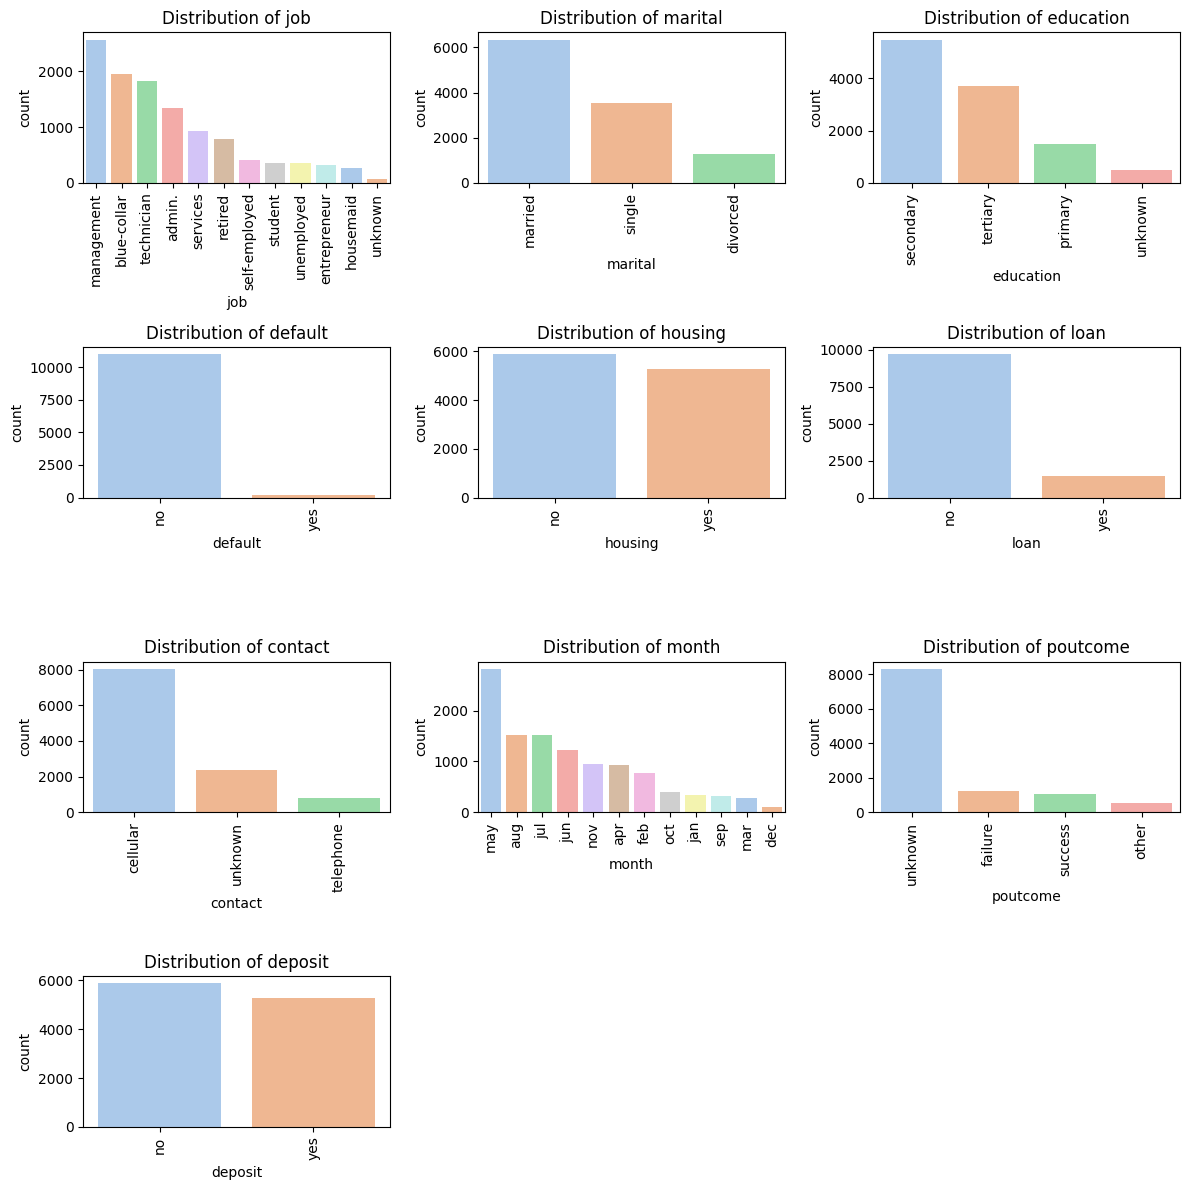

In [9]:
## Categorical columns distribution
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12,12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4,3,i)
    sns.countplot(data=df, x = col, palette = 'pastel', order = df[col].value_counts().index)
    plt.xticks(rotation = 90)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

### Insights from Categorical Variable Distributions

1. **Job**:
   - Most of the clients belong to the "management" and "blue-collar" job categories.
   - Categories like "student", "housemaid", and "unknown" have relatively fewer observations.

2. **Marital Status**:
   - The majority of clients are "married", followed by "single". 
   - "Divorced" individuals make up the smallest portion.

3. **Education**:
   - Most clients have "secondary" education, followed by "tertiary".
   - The "unknown" category is minimal, suggesting good data quality in this field.

4. **Default**:
   - A significant majority of clients do not have a credit default ("no"), with very few marked as "yes".

5. **Housing**:
   - Housing loan ownership is evenly distributed, but slightly more clients have housing loans ("yes").

6. **Loan**:
   - A large portion of clients do not have personal loans ("no"), with fewer having them.

7. **Contact**:
   - "Cellular" is the most common communication type, while "unknown" and "telephone" are less common.

8. **Month**:
   - The majority of interactions occurred in May. 
   - Other months have fewer interactions, with December and March being the least represented.

9. **Poutcome**:
   - Most of the records fall under "unknown" for the previous campaign outcome.
   - Among known outcomes, "failure" is the most common, while "success" is the least.

10. **Deposit**:
    - The target variable indicates a near-even split, with slightly more "no" than "yes".
    - This suggests a balanced dataset for modeling.


In [10]:
## Distribution of numerical columns

num_cols = [col for col in df.columns if col not in cat_cols]
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

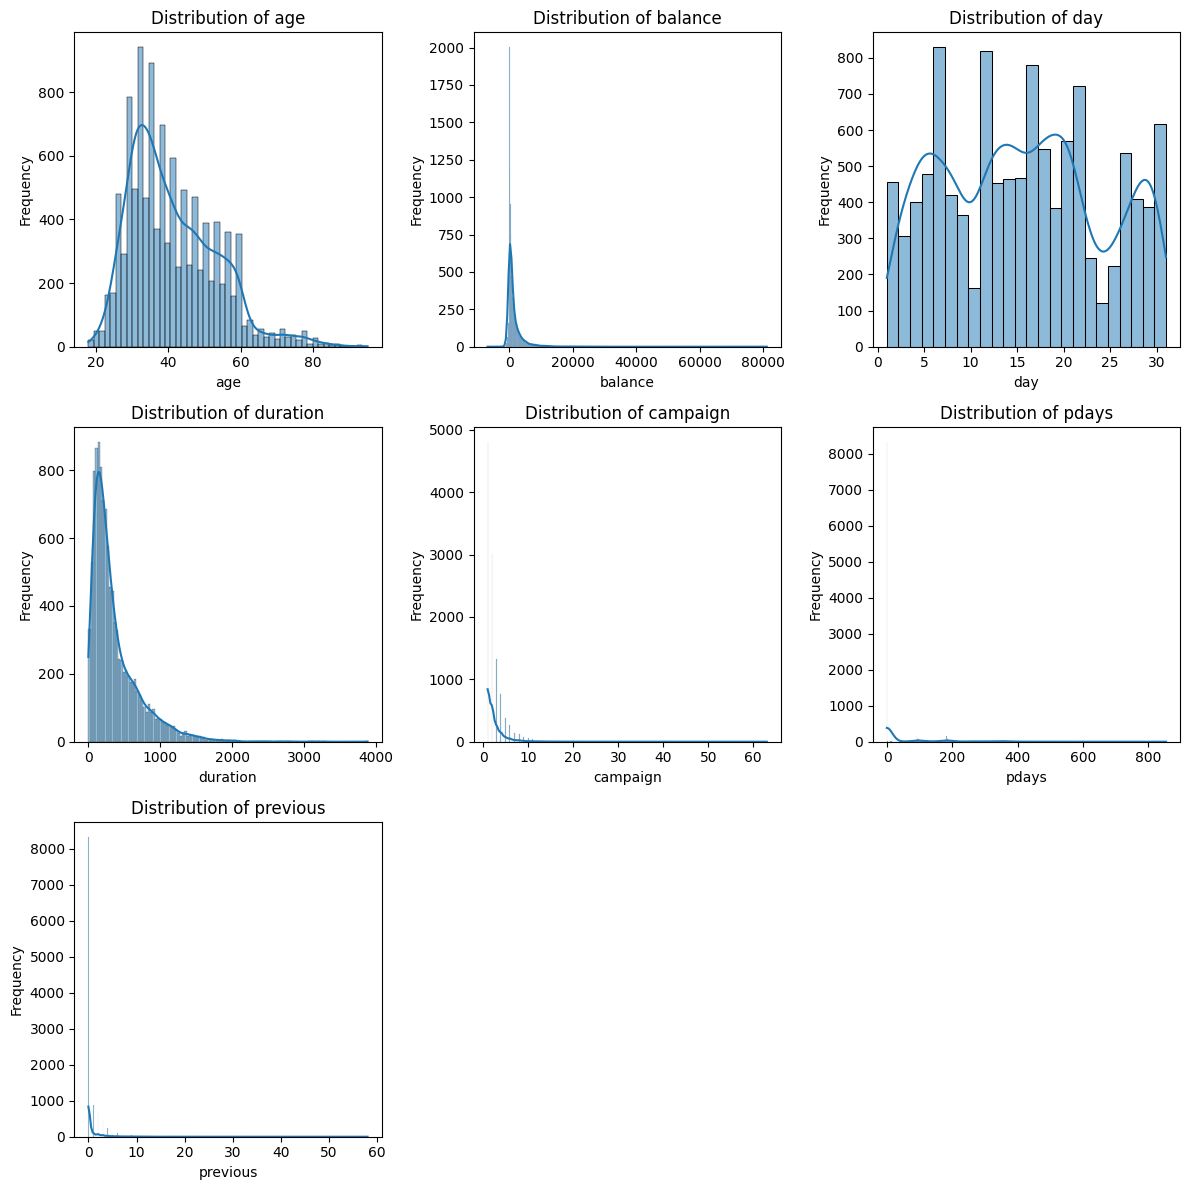

In [11]:
plt.figure(figsize=(12,12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    sns.histplot(data=df, x=col, kde=True)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

### Insights from Histograms

1. **Age**: 
   - The distribution of age is positively skewed, with most customers falling between the ages of 20 and 60.
   - A small number of customers are older than 80, indicating outliers.

2. **Balance**: 
   - The majority of balances are concentrated near zero, showing that most customers maintain relatively low balances.
   - There are significant outliers with very high balances, which might require further investigation.

3. **Day**: 
   - The distribution of transactions is fairly uniform across the days of the month, with no noticeable bias towards specific days.

4. **Duration**: 
   - The call duration is highly right-skewed, with most calls being very short.
   - A few calls with much longer durations are observed, which could represent outliers or rare events.

5. **Campaign**: 
   - Most customers were contacted fewer than 5 times during the campaign, with a long tail of higher values.
   - Very few customers were contacted more than 20 times, suggesting an outlier scenario.

6. **Pdays**: 
   - The majority of values are at 999, indicating that most customers were not contacted in a previous campaign.
   - Other values represent a smaller group of customers who were contacted earlier.

7. **Previous**: 
   - Similar to the campaign variable, most values for previous contacts are below 5.
   - There is a long tail for customers with a higher number of previous contacts, though these cases are rare.


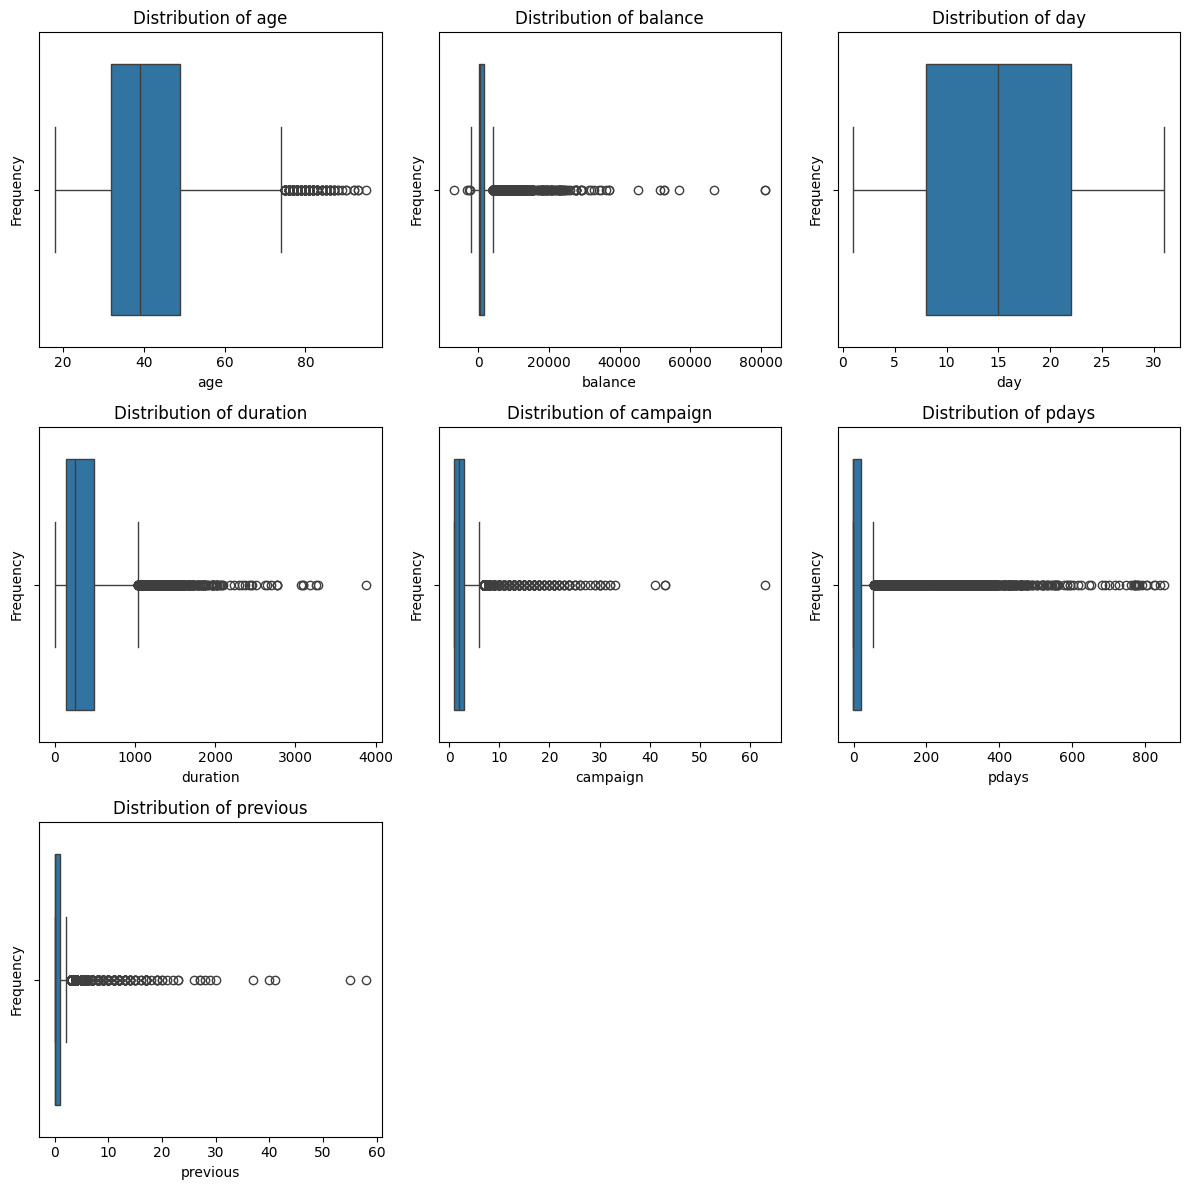

In [12]:
## Outliers check
plt.figure(figsize = (12,12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    sns.boxplot(data=df, x=col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

### Insights from Boxplots for Numeric Columns

1. **Age**:
   - The majority of the population falls between 20 to 60 years, with no significant outliers observed.

2. **Balance**:
   - A large portion of customers have a balance close to zero. However, there are a few extreme outliers with significantly high balances.

3. **Day**:
   - The distribution of `day` is relatively uniform, with no noticeable outliers. This suggests consistent contact throughout the month.

4. **Duration**:
   - Most calls have a short duration, with a few outliers indicating much longer calls. These longer calls might represent customers who are more engaged or close to conversion.

5. **Campaign**:
   - A significant number of customers were contacted multiple times, as seen by the many outliers. The majority of values, however, are concentrated within a few contact attempts.

6. **Pdays**:
   - The data is heavily skewed, with most values near zero, indicating that a large number of customers were not contacted in the previous campaign. Outliers suggest some customers had a large gap since the last contact.

7. **Previous**:
   - The `previous` variable shows that most customers had few interactions, but there are notable outliers where customers had multiple interactions in prior campaigns.


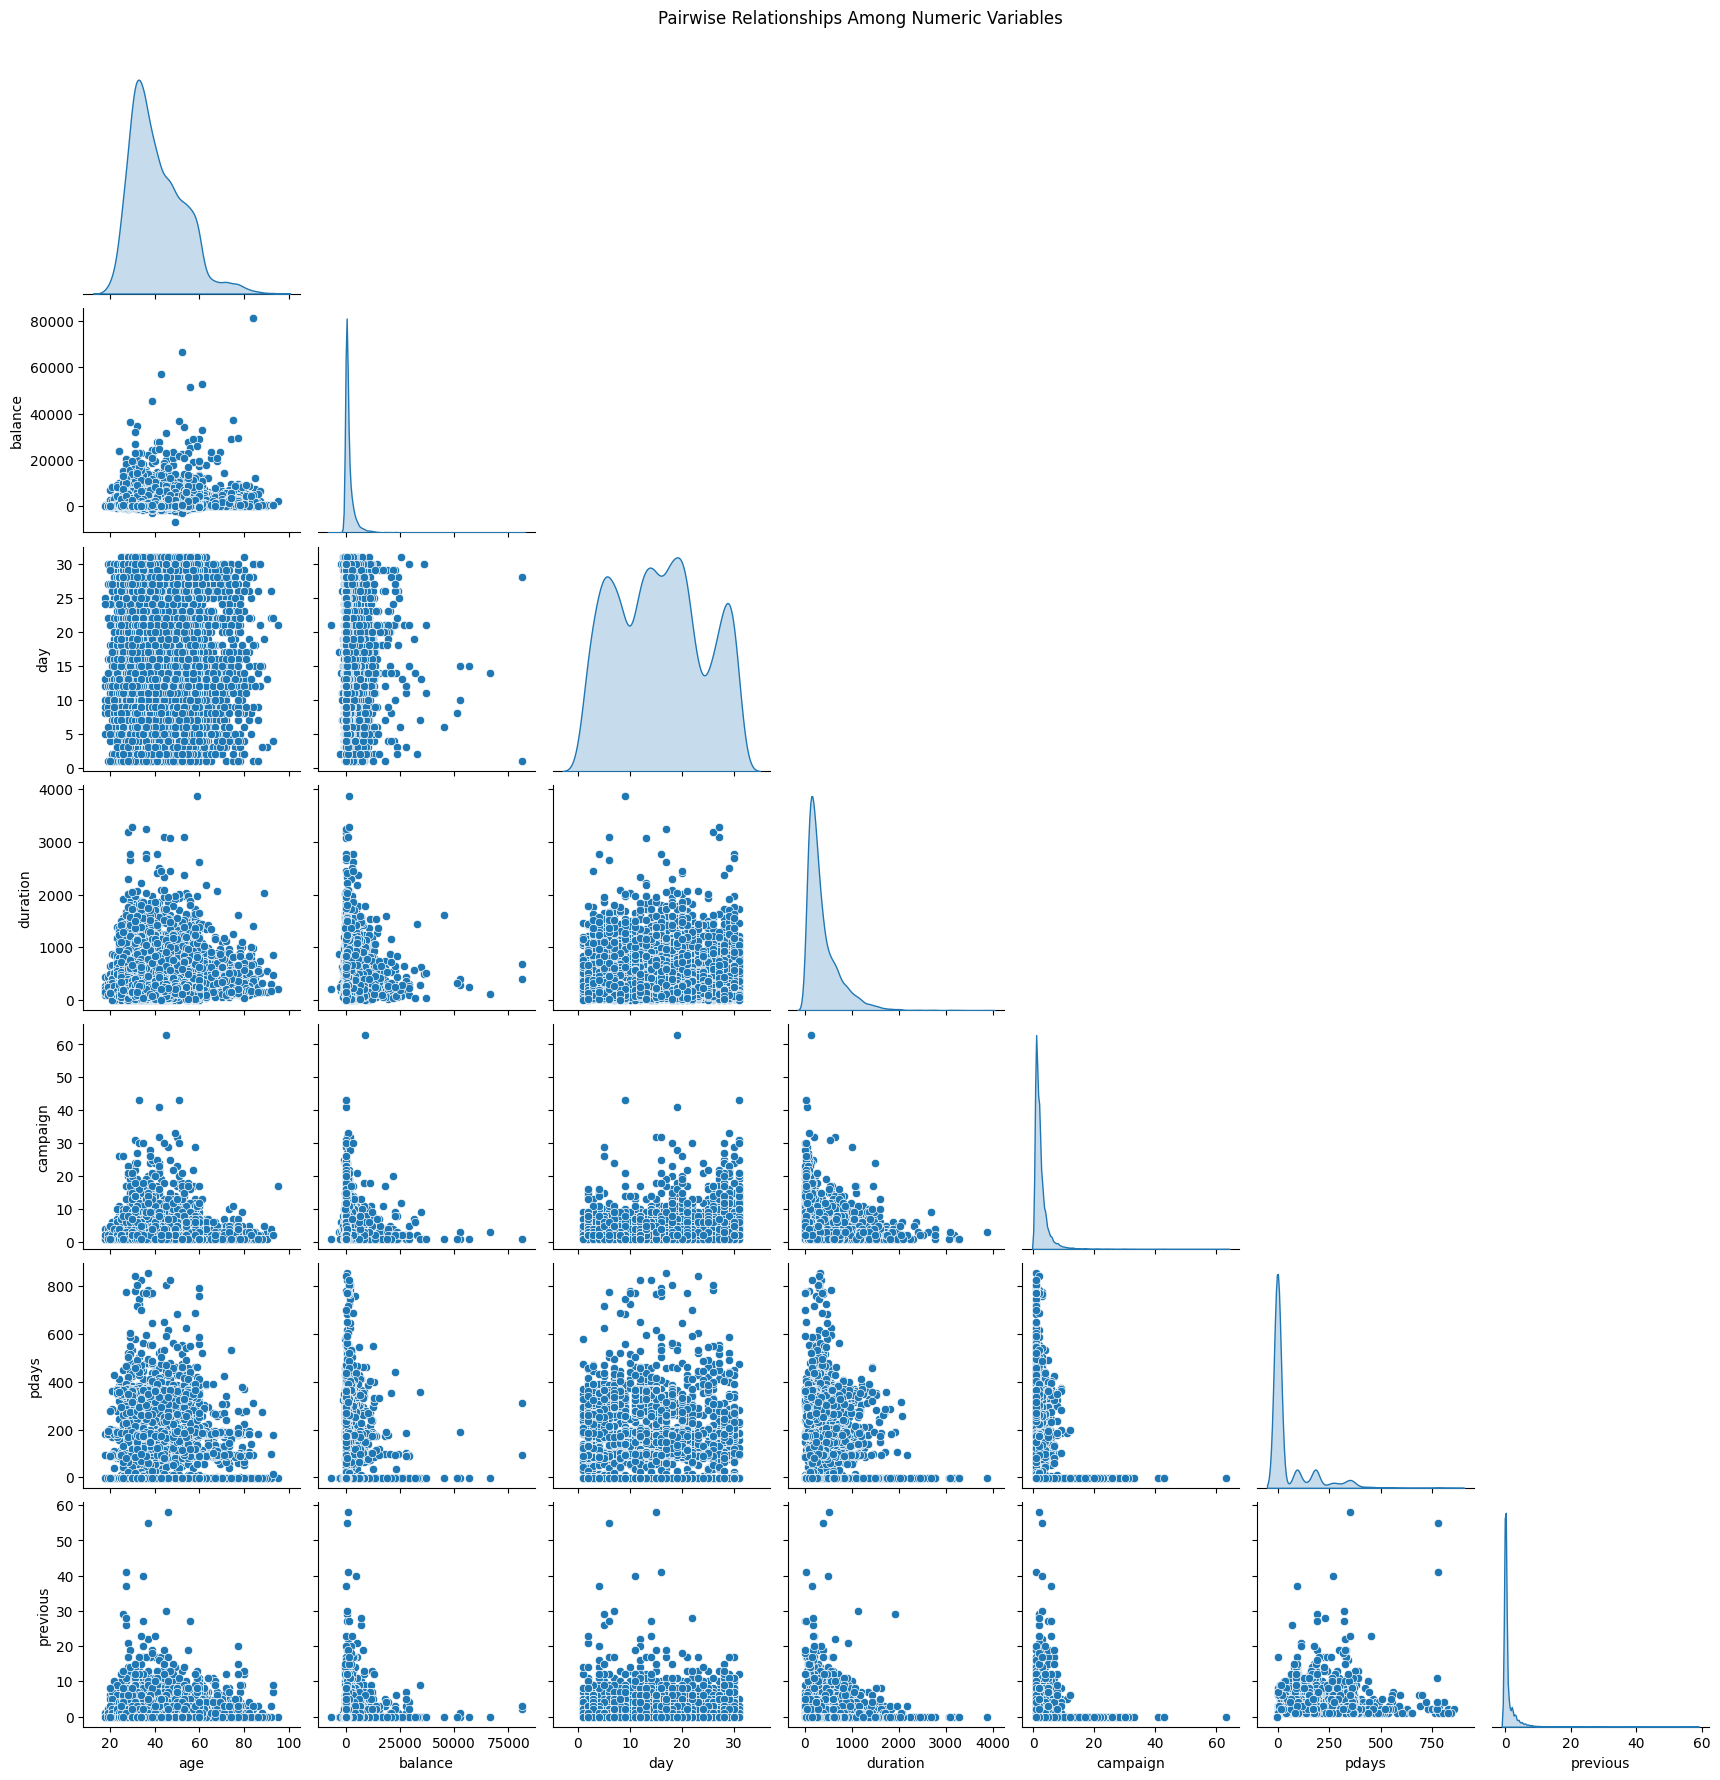

In [13]:
## Bivariate Analysis

# Pairplot for bivariate analysis
sns.pairplot(df[num_cols], diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships Among Numeric Variables", y=1.02)
plt.show()

### Pairplot Insights

1. **Age vs. Balance**: There doesn't seem to be a strong linear relationship between age and balance. However, a few older individuals tend to have higher balances compared to others.

2. **Duration vs. Campaign**: There's no consistent trend between the number of contacts (`campaign`) and the duration of calls (`duration`). Longer call durations are not necessarily associated with a higher number of campaign attempts.

3. **Pdays vs. Campaign**: Most `pdays` values are clustered around 0, indicating many customers were contacted for the first time. No strong relationship is observed between `pdays` and `campaign`.

4. **Balance vs. Duration**: Higher account balances occasionally coincide with longer call durations, but the majority of calls occur for accounts with moderate balances.

5. **Day vs. Other Variables**: The `day` variable (likely indicating the day of the month) shows no notable pattern with other numeric variables, suggesting calls occur randomly across different days.

6. **Previous vs. Duration**: While higher values of `previous` contacts sometimes correspond to longer call durations, the relationship isn't pronounced.

7. **Outliers**: Significant outliers are present across variables such as `balance`, `duration`, `campaign`, and `previous`. These might require further investigation or handling based on the analysis objectives.


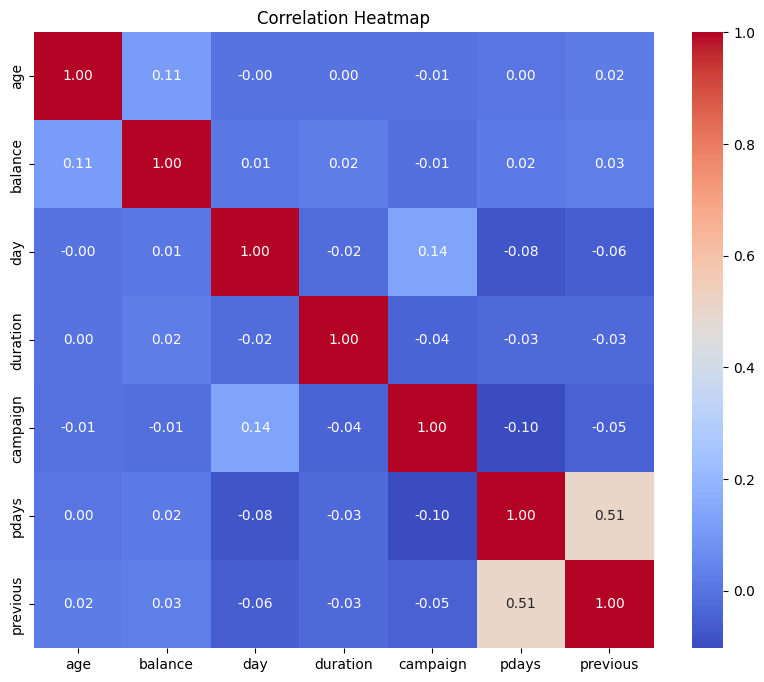

In [14]:
## Correlation analysis
# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Correlation Heatmap Analysis

**Key Observations:**
   - The `pdays` and `previous` columns exhibit a moderate positive correlation (0.51), suggesting a relationship between the number of days since a prior contact and the number of previous contacts.
   - Other numeric columns show very weak or negligible correlations with one another, indicating minimal linear relationships.

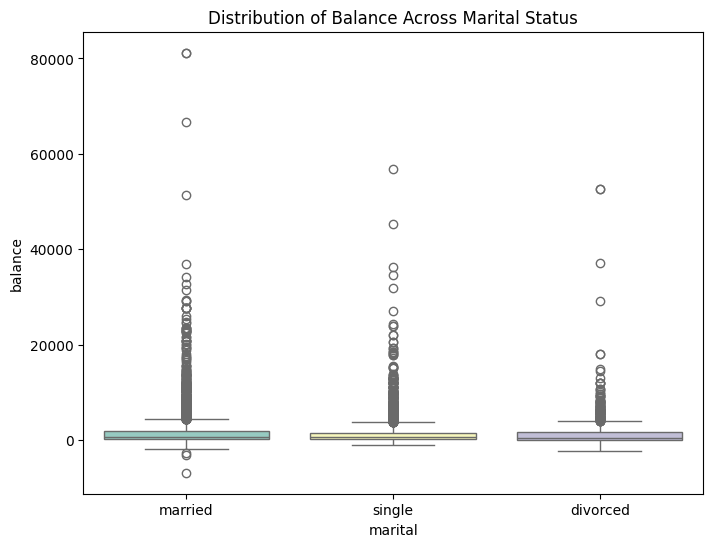

In [15]:
# Boxplot: Distribution of 'balance' across 'marital' status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='marital', y='balance', palette='Set3')
plt.title('Distribution of Balance Across Marital Status')
plt.show()

Married and single people seem to be having higher ranges of account balance as compared to the people that are divorced. These classification of people could be prioritized for campaigns as they have higher potential to subscribe for the schemes.

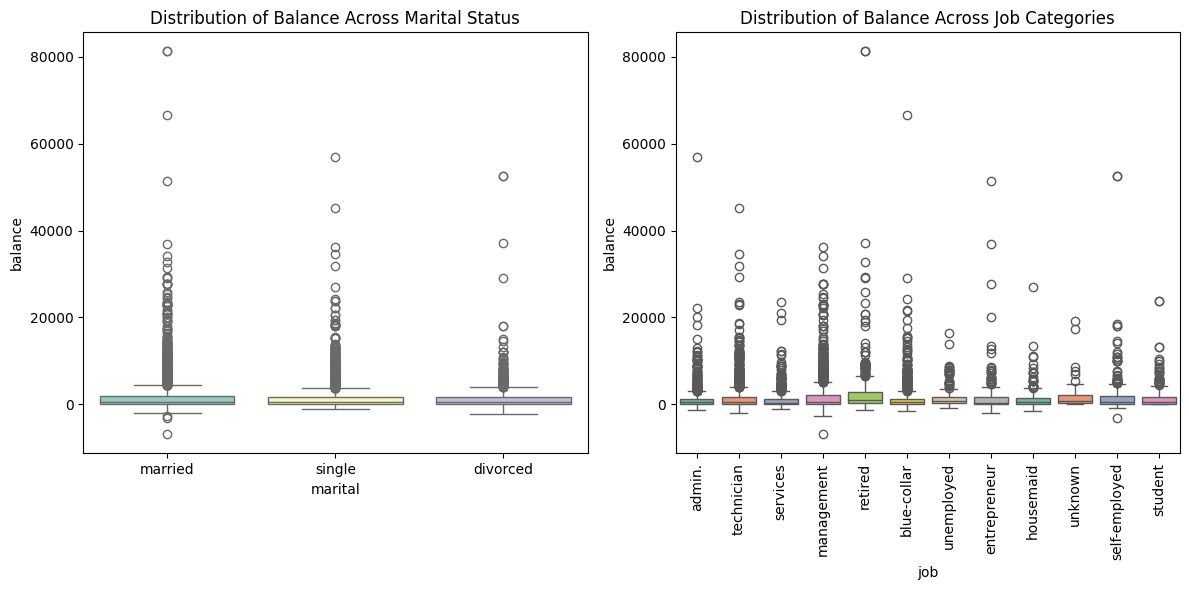

In [16]:
# Example: Distribution of 'balance' across 'job' and 'marital' categories

fig, axes = plt.subplots(1,2, figsize = (12,6))
sns.boxplot(data=df, x='marital', y='balance', palette='Set3', ax = axes[0])
axes[0].set_title('Distribution of Balance Across Marital Status')

sns.boxplot(data=df, x='job', y='balance', palette='Set2', ax = axes[1])
axes[1].set_title('Distribution of Balance Across Job Categories')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Marital Status:**
The distribution of balances is relatively similar across all marital status categories. However, the 'married' and 'single' groups exhibit a higher number of outliers, indicating individuals with significantly higher balances compared to the 'divorced' group. These groups could be targeted for campaigns, as they demonstrate greater financial capacity.

**Job:**
The distribution of balances appears to be relatively similar across all job categories. However, there is a noticeable concentration of outliers in the 'retired,' 'blue-collar,' 'entrepreneur,' and 'admin.' categories. These groups could be prioritized for targeted campaigns, particularly if they overlap with high-priority marital statuses, such as married or single individuals in these job roles.

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


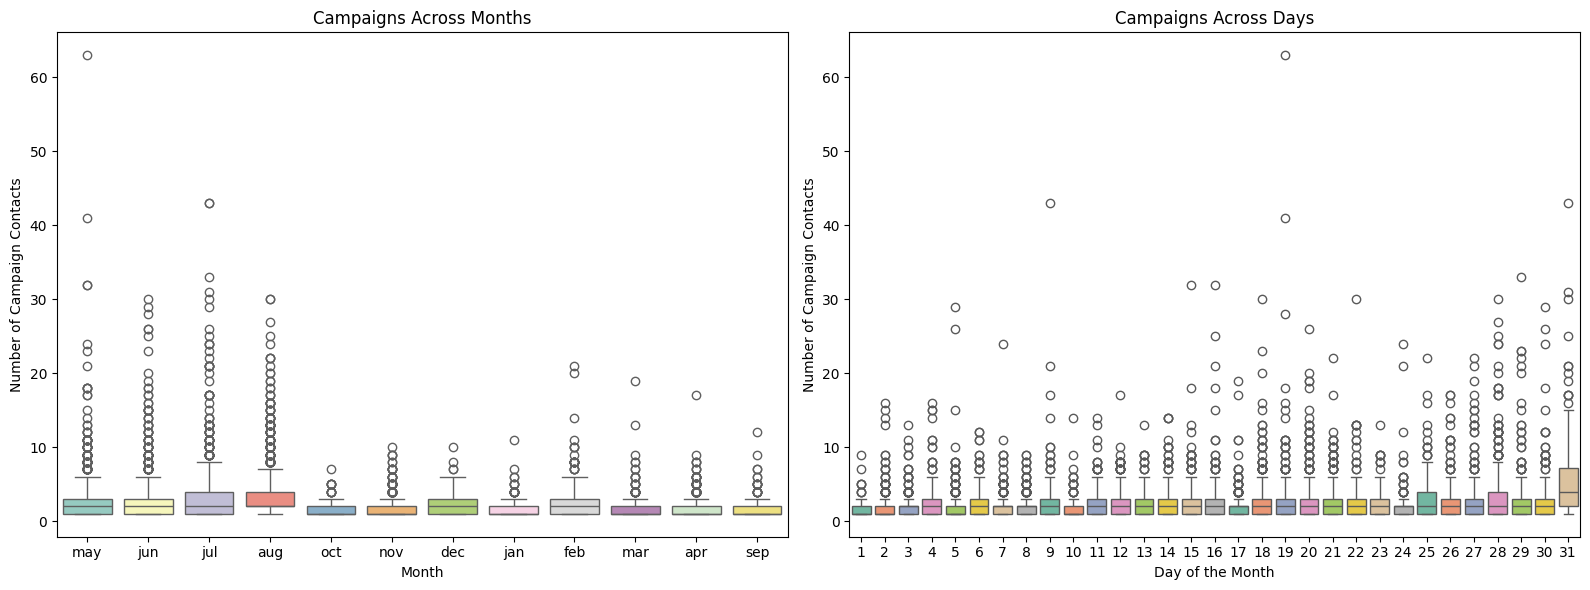

In [18]:
# Setting up the subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Month vs Campaign
sns.boxplot(data=df, x='month', y='campaign', palette='Set3', ax=axes[0])
axes[0].set_title('Campaigns Across Months')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Campaign Contacts')

# Days vs Campaign
sns.boxplot(data=df, x='day', y='campaign', palette='Set2', ax=axes[1])
axes[1].set_title('Campaigns Across Days')
axes[1].set_xlabel('Day of the Month')
axes[1].set_ylabel('Number of Campaign Contacts')

plt.tight_layout()
plt.show()


**Campaigns Across Months**
The distribution of campaign contacts varies across months, with May, July, and August showing the highest number of outliers, indicating higher campaign activity during these months. Other months like January and February exhibit much lower variability and fewer outliers, suggesting less focus or responsiveness during these periods.

**Campaigns Across Days**
Campaign activity appears consistent across most days, but certain days like the 31st stand out with more outliers, indicating higher spikes in campaign contacts. Days like the 10th and 20th also show slight peaks, which could be leveraged for strategic targeting.

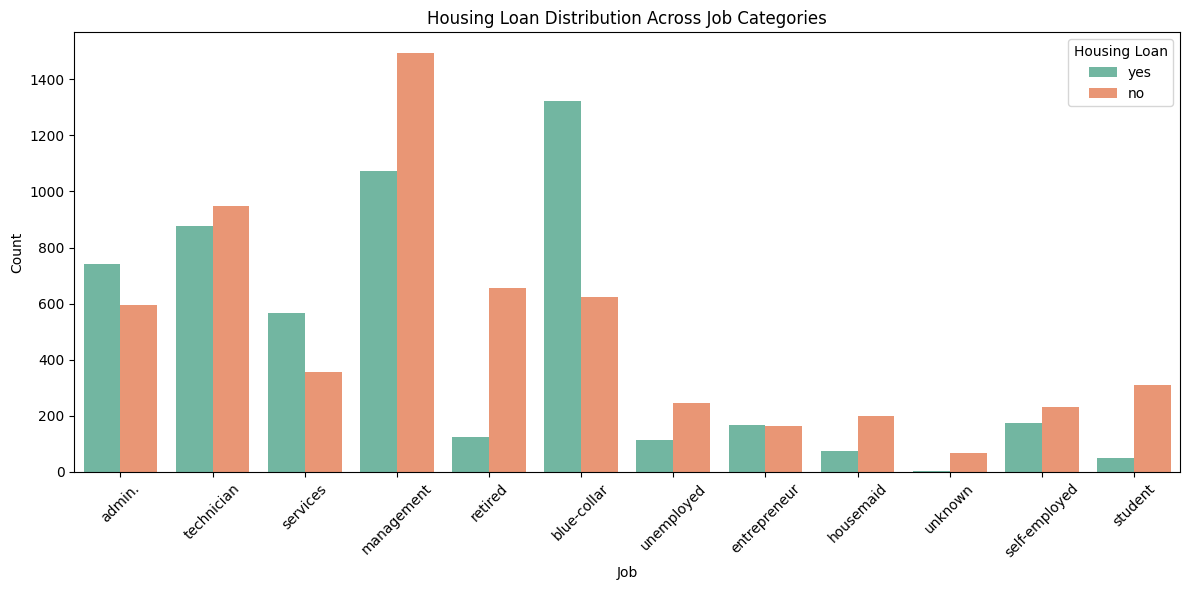

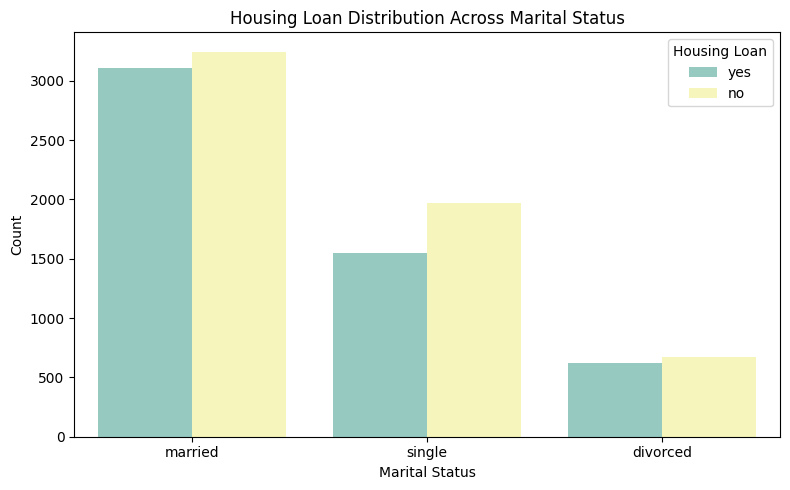

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped bar chart for housing loan across job and marital status
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='housing', palette='Set2', ax=ax)
plt.title('Housing Loan Distribution Across Job Categories')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Job')
plt.legend(title='Housing Loan', loc='upper right')
plt.tight_layout()
plt.show()

# Grouped bar chart for housing loan across marital status
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data=df, x='marital', hue='housing', palette='Set3', ax=ax)
plt.title('Housing Loan Distribution Across Marital Status')
plt.ylabel('Count')
plt.xlabel('Marital Status')
plt.legend(title='Housing Loan', loc='upper right')
plt.tight_layout()
plt.show()

- Blue-collar workers have the highest count of housing loans, indicating their reliance on financial assistance for housing needs.
- Management roles show more individuals without housing loans, likely due to higher income levels enabling direct purchases.
- Students, housemaids, and the unemployed have very low housing loan counts, reflecting limited financial eligibility.
- Categories like technicians and retired individuals show a relatively balanced split between having and not having housing loans.
- Jobs with an "unknown" category have the least data, making it difficult to draw conclusions.

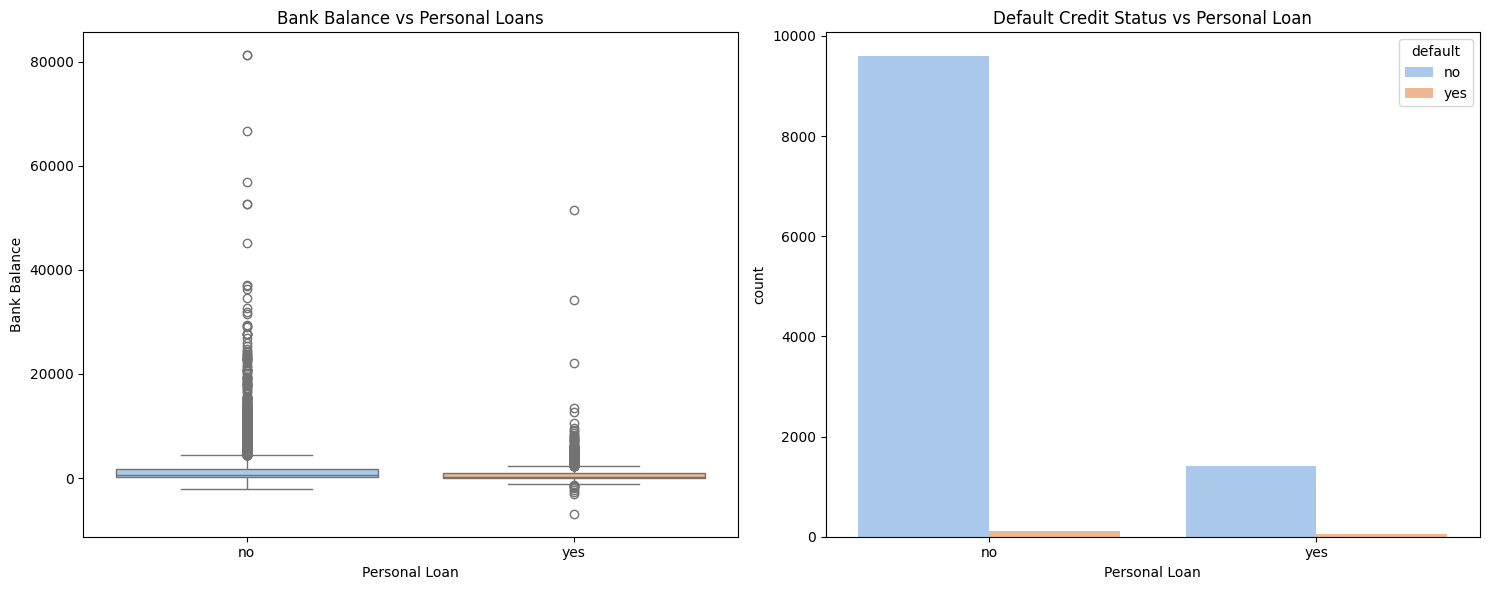

In [20]:
fig, axes = plt.subplots(1,2, figsize = (15,6))
sns.boxplot(data = df, x = 'loan', y = 'balance', palette='pastel', ax = axes[0])
axes[0].set_title('Bank Balance vs Personal Loans')
axes[0].set_xlabel('Personal Loan')
axes[0].set_ylabel('Bank Balance')

sns.countplot(data = df, x = 'loan', hue='default', palette='pastel', ax = axes[1])
axes[1].set_title("Default Credit Status vs Personal Loan")
axes[1].set_xlabel('Personal Loan')

plt.tight_layout()
plt.show()

 **1. Bank Balance vs Personal Loans**  
- Customers **without personal loans** generally have a **higher range of bank balances** compared to those with personal loans.  
- There are several outliers in the `no loan` category, with some customers having very high bank balances.  
- Median bank balance is significantly lower for customers with personal loans, indicating potential financial constraints leading to loan necessity.  

 **2. Default Credit Status vs Personal Loans**  
- The majority of customers who have **defaulted on credit** are from the **no personal loan** category.  
- Customers who have taken personal loans and also defaulted are **extremely rare**.  
- This suggests that customers who opt for personal loans tend to be more cautious about maintaining their credit status.  


### Scheme success Analysis

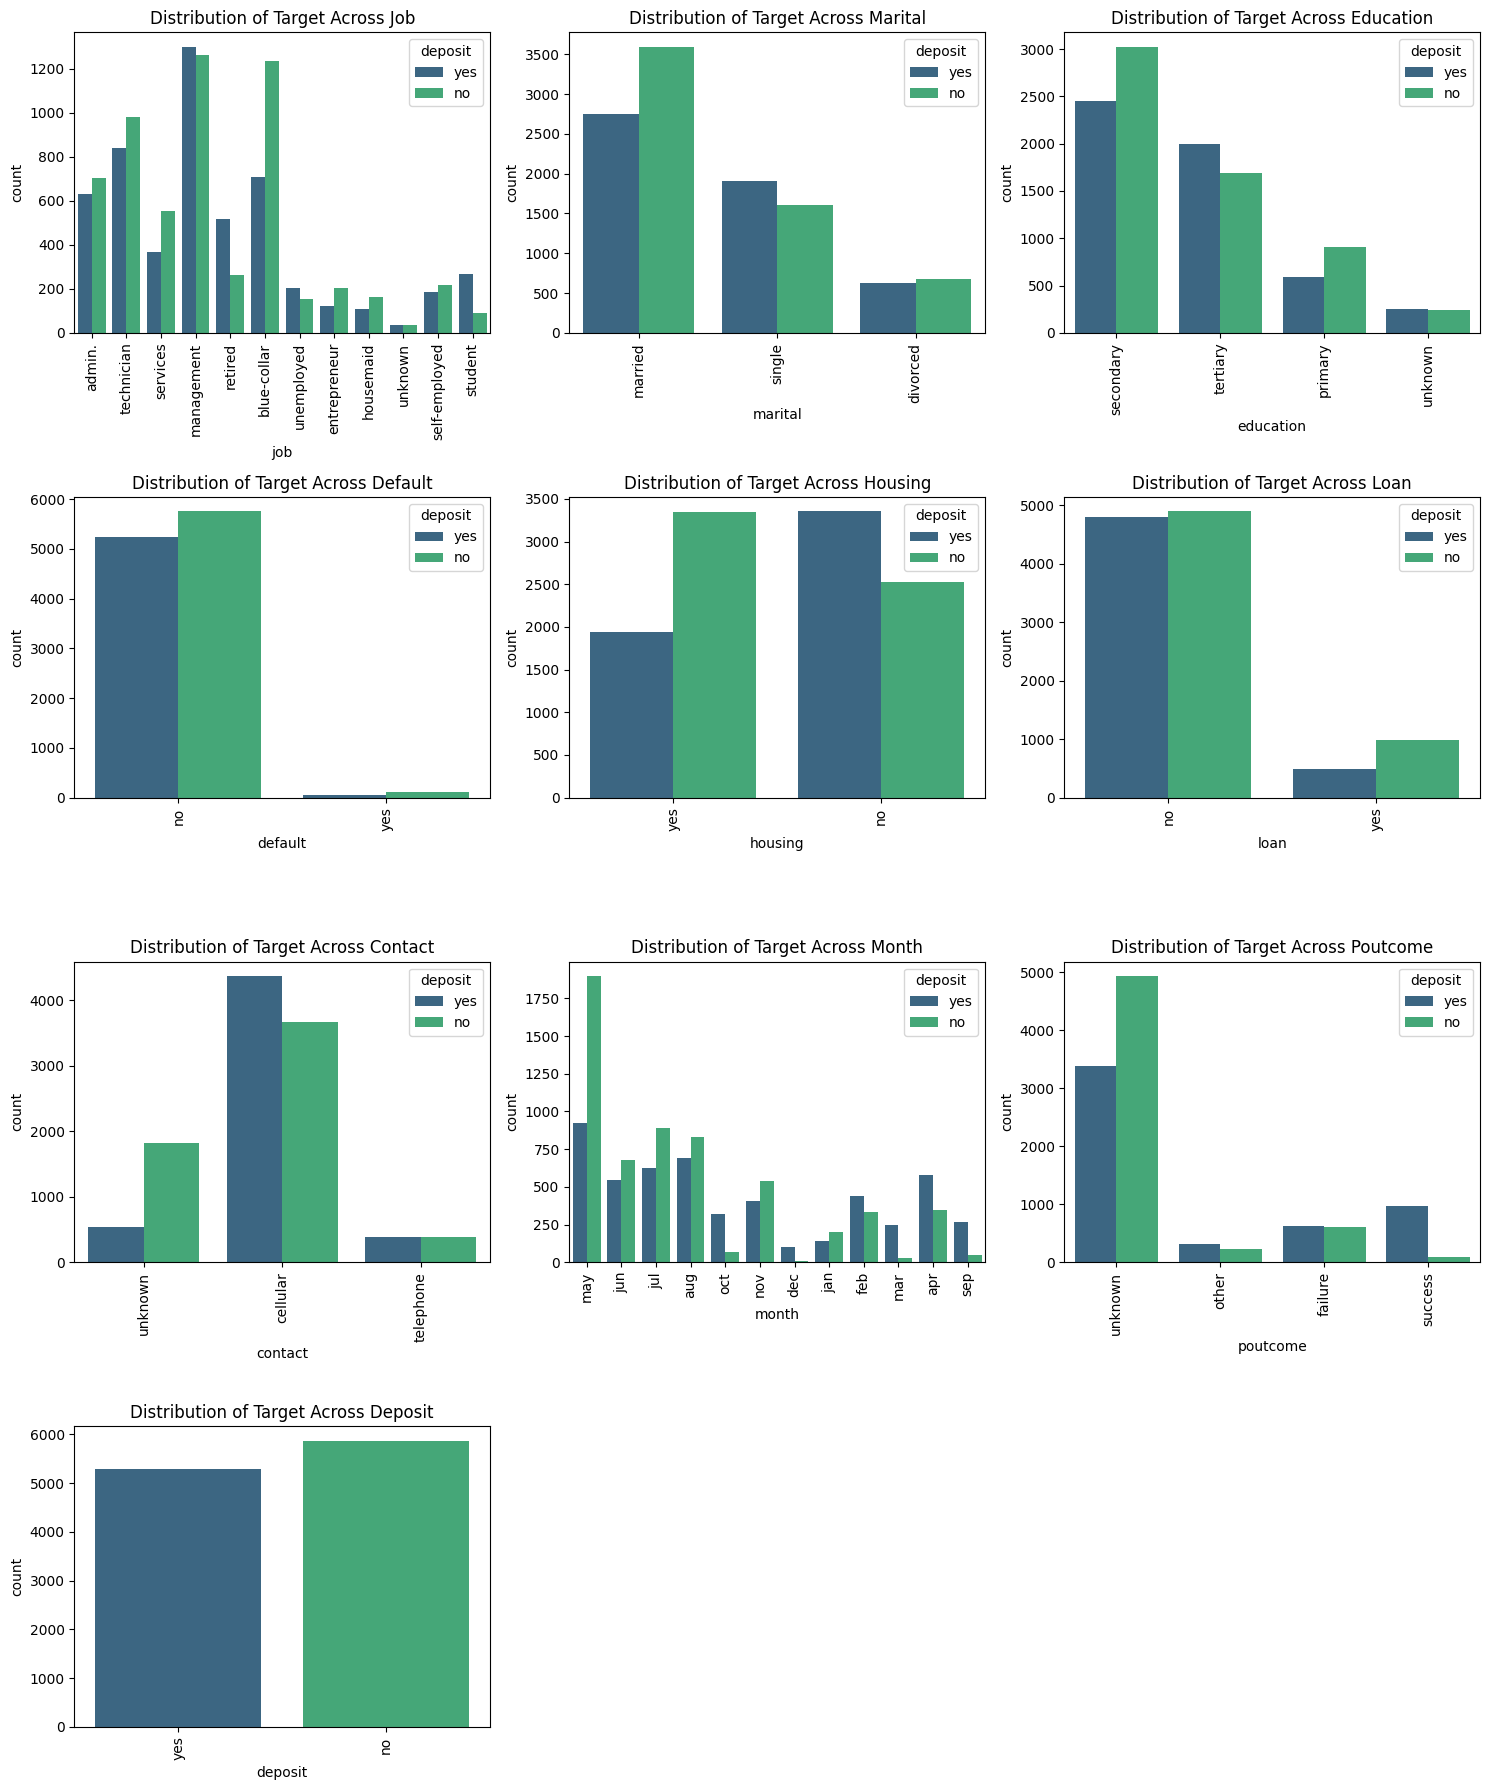

In [21]:
## Categorical variables and traget column(deposit)

plt.figure(figsize=(15,18))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4,3,i)
    sns.countplot(data=df, x=col, hue='deposit', palette='viridis')
    plt.title(f"Distribution of Target Across {col.capitalize()}")
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Insights from Categorical Variable Analysis with Target (Deposit)

1. **Job**:
   - The "blue-collar" and "management" categories show the highest counts overall.
   - Customers in the "student" and "retired" categories seem to have a higher proportion of positive deposits (`yes`) compared to other job categories.

2. **Marital**:
   - Married customers dominate the dataset, followed by single customers.
   - A higher proportion of singles opted for a deposit compared to married or divorced individuals.

3. **Education**:
   - Customers with tertiary education show the highest proportion of deposits (`yes`), indicating a potential correlation between higher education and positive deposit behavior.
   - The primary education group has a lower rate of deposits.

4. **Default**:
   - Almost all customers in the dataset have `no` defaults.
   - Defaulted customers rarely opt for deposits, showing a strong correlation between financial stability and deposits.

5. **Housing**:
   - Customers without a housing loan (`no`) are more likely to deposit compared to those with housing loans.

6. **Loan**:
   - Customers without personal loans (`no`) are significantly more likely to deposit, while customers with loans have a much smaller proportion of deposits.

7. **Contact**:
   - Customers contacted via cellular methods are more likely to deposit, whereas "unknown" contact methods have low deposit rates.

8. **Month**:
   - May has the highest customer interactions, but deposits are not as frequent during this month.
   - September and October have higher proportions of deposits (`yes`) relative to other months.

9. **Poutcome**:
   - Customers with a "success" outcome from a previous campaign are highly likely to deposit.
   - "Unknown" outcomes dominate the dataset but have a lower deposit rate.

## **Summary of EDA Findings from All Graphs and Insights**  

### **1. General Trends in Deposits**  
- **Overall Subscription Rate**: The dataset is **imbalanced**, with fewer customers subscribing (`deposit = yes`).  
- **Call Duration Impact**: Longer call durations strongly correlate with a higher likelihood of subscription.  
- **Balance Influence**: Customers with higher balances are more likely to subscribe, but many have low or negative balances.  

### **2. Customer Demographics & Behavior**  
- **Age Distribution**:  
  - Most subscribers are **between 25-45 years old**.  
  - Senior citizens (`60+ years`) are **less likely to subscribe**, possibly due to financial security or retirement.  

- **Job Role & Subscription Likelihood**:  
  - Higher conversion in **management, technicians, and admin** roles.  
  - **Blue-collar workers** and **students** have lower subscription rates.  

- **Education Level**:  
  - **Higher education levels** (university degrees) correlate with **higher subscription rates**.  
  - **Basic education holders** subscribe the least.  

- **Marital Status Impact**:  
  - **Single individuals** are more likely to subscribe than married or divorced customers.  
  - Possibly due to **financial independence** or lower existing commitments.  

### **3. Contact & Campaign Insights**  
- **Previous Marketing Contact Effect (`previous` & `poutcome`)**:  
  - Customers **who engaged in previous campaigns** are more likely to subscribe.  
  - If the previous campaign was **successful**, there’s a much higher chance of conversion.  

- **Number of Contacts (`campaign`)**:  
  - More contacts **do not always** increase conversion.  
  - Beyond **4-5 contacts, success rate declines** (customers may feel annoyed).  

- **Days Since Last Contact (`pdays`)**:  
  - **Lower pdays (recent contact)** increases the chances of a deposit.  
  - **Long gaps between contacts reduce** conversion likelihood.  

### **4. Loan & Financial Indicators**  
- **Housing Loan Effect**:  
  - Customers **without housing loans** are more likely to subscribe.  
  - Those with a mortgage may already have financial commitments.  

- **Personal Loans**:  
  - Having a **personal loan reduces** the likelihood of subscription.  
  - Indicates existing financial burdens.  

### **5. Seasonality & External Factors**  
- **Month-wise Subscription Trends**:  
  - Highest subscriptions in **March, May, September, and October**.  
  - **Lowest in December**, likely due to holiday expenses.  

---
📌 **Key Takeaways**:  
- **Customer profiling matters**: Job, education, and marital status influence deposit likelihood.  
- **Campaign strategies need optimization**: Too many contacts harm conversion rates.  
- **Financial conditions impact decisions**: Loans reduce deposits.  

🔍 **Next Step – Customer Segmentation**:  
- Group customers into **clusters based on similar behaviors**.  
- Identify **patterns within each segment** to refine marketing strategies.  


## Feature Engineering

## Testing with OLS model for significant Features

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


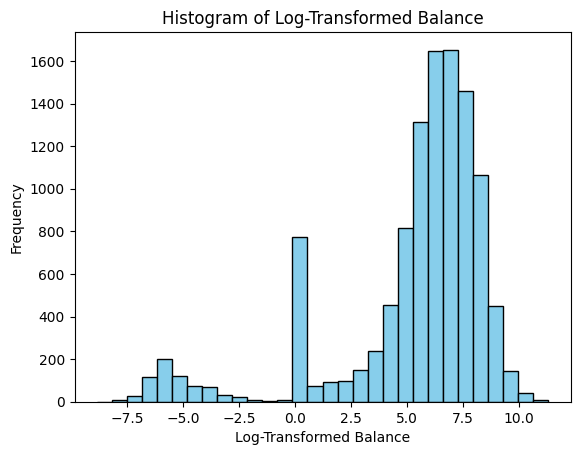

In [23]:
## log transform the variables balance, duration

df['log_balance'] = df['balance'].apply(lambda x: np.log1p(x) if x>0 else -np.log1p(abs(x)))

# Visualize the transformed data
plt.hist(df['log_balance'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Log-Transformed Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Balance')
plt.show()

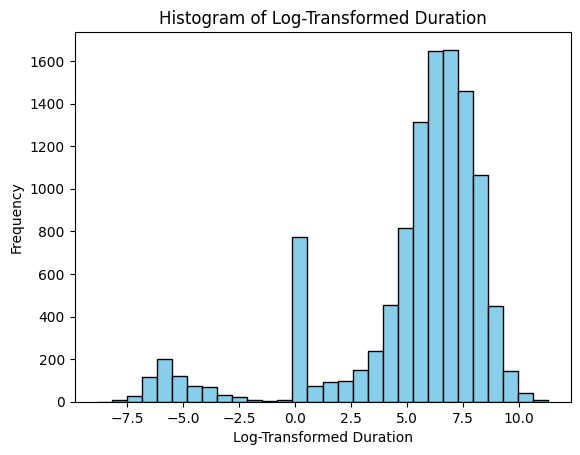

In [24]:
## log transform duration
df['log_duration'] = df['duration'].apply(lambda x: np.log(x))

# Visualize the transformed data
plt.hist(df['log_balance'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Log-Transformed Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Duration')
plt.show()

## Capping pdays, campaign and previous

In [25]:
cap_value = df['campaign'].quantile(0.95)
df['campaign_capped'] = np.clip(df['campaign'], None, cap_value)
df['campaign_capped'] = df['campaign_capped'].apply(lambda x: np.log1p(x))

df['pdays'] = df['pdays'].replace(-1,0)
cap_value = df['pdays'].quantile(0.95)
df['pdays_capped'] = np.clip(df['pdays'], None, cap_value)
df['pdays_capped'] = df['pdays_capped'].apply(lambda x: np.log1p(x))

cap_value = df['previous'].quantile(0.95)
df['previous_capped'] = np.clip(df['previous'], None, cap_value)
df['previous_capped'] = df['previous_capped'].apply(lambda x: np.log1p(x))

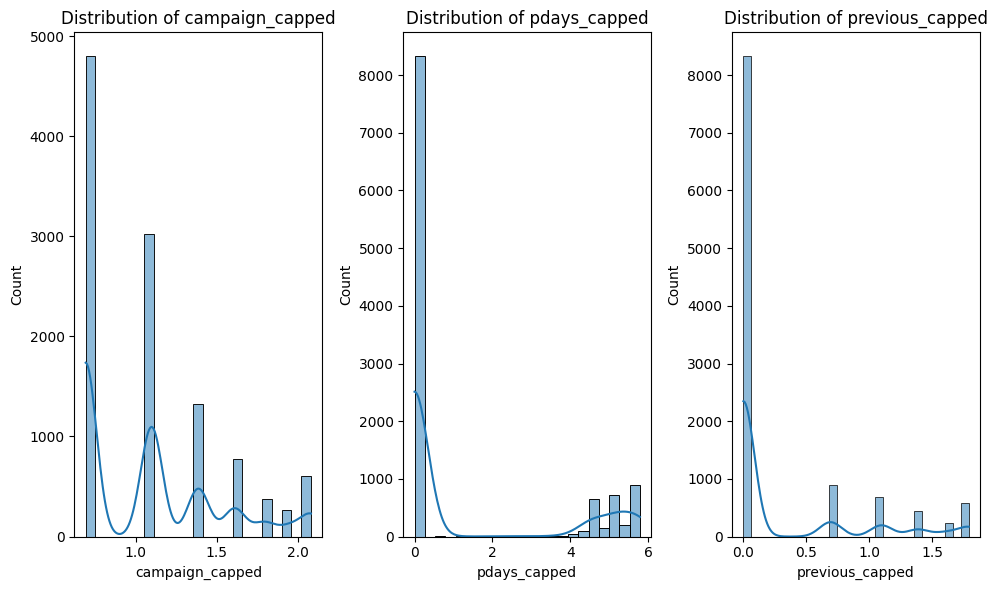

In [26]:
## Histogram of changed variables

fig, axes = plt.subplots(1,3, figsize = (10,6))
sns.histplot(data = df, x='campaign_capped', kde=True, ax = axes[0])
axes[0].set_title('Distribution of campaign_capped')

sns.histplot(data = df, x='pdays_capped', kde=True, ax = axes[1])
axes[1].set_title('Distribution of pdays_capped')

sns.histplot(data = df, x='previous_capped', kde=True, ax = axes[2])
axes[2].set_title('Distribution of previous_capped')

plt.tight_layout()
plt.show()


In [27]:
## drop the original columns and rename the transformed numerical columns

df = df.drop(columns = ['balance','duration','campaign','pdays','previous'], axis = 1)
df.head()

,age,job,marital,education,default,housing,loan,contact,day,month,poutcome,deposit,log_balance,log_duration,campaign_capped,pdays_capped,previous_capped
0,59,admin.,married,secondary,no,yes,no,unknown,5,may,unknown,yes,7.759614,6.948897,0.693147,0.0,0.0
1,56,admin.,married,secondary,no,no,no,unknown,5,may,unknown,yes,3.828641,7.290975,0.693147,0.0,0.0
2,41,technician,married,secondary,no,yes,no,unknown,5,may,unknown,yes,7.147559,7.236339,0.693147,0.0,0.0
3,55,services,married,secondary,no,yes,no,unknown,5,may,unknown,yes,7.814803,6.361302,0.693147,0.0,0.0
4,54,admin.,married,tertiary,no,no,no,unknown,5,may,unknown,yes,5.220356,6.511745,1.098612,0.0,0.0


In [28]:
df = df.rename({'log_balance':'balance',
                'log_duration':'duration',
                'campaign_capped':'campaign',
                'pdays_capped':'pdays',
                'previous_capped':'previous'}, axis = 1)

df['deposit'] = df['deposit'].replace({'yes':1, 'no':0})

df.head()

,age,job,marital,education,default,housing,loan,contact,day,month,poutcome,deposit,balance,duration,campaign,pdays,previous
0,59,admin.,married,secondary,no,yes,no,unknown,5,may,unknown,1,7.759614,6.948897,0.693147,0.0,0.0
1,56,admin.,married,secondary,no,no,no,unknown,5,may,unknown,1,3.828641,7.290975,0.693147,0.0,0.0
2,41,technician,married,secondary,no,yes,no,unknown,5,may,unknown,1,7.147559,7.236339,0.693147,0.0,0.0
3,55,services,married,secondary,no,yes,no,unknown,5,may,unknown,1,7.814803,6.361302,0.693147,0.0,0.0
4,54,admin.,married,tertiary,no,no,no,unknown,5,may,unknown,1,5.220356,6.511745,1.098612,0.0,0.0


## Split the data into train and test sets

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.metrics import silhouette_score

## X and y for OLS
X = df.drop(columns=['deposit'], axis=1)
y = df['deposit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train

,age,job,marital,education,default,housing,loan,contact,day,month,poutcome,balance,duration,campaign,pdays,previous
3955,28,student,single,tertiary,no,no,no,cellular,10,sep,failure,8.655563,6.948897,1.791759,5.303305,1.386294
11150,34,management,married,secondary,no,no,no,cellular,21,aug,unknown,5.874931,5.749393,1.386294,0.000000,0.000000
5173,48,unemployed,divorced,secondary,no,no,no,cellular,10,nov,success,5.308268,6.386879,0.693147,4.521789,0.693147
3017,53,entrepreneur,married,tertiary,no,no,no,cellular,15,dec,unknown,7.581720,5.860786,0.693147,0.000000,0.000000
2910,53,management,married,tertiary,no,no,no,cellular,11,nov,success,7.393263,5.111988,1.386294,4.584967,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,47,management,married,tertiary,no,yes,no,cellular,11,jul,unknown,6.635947,4.382027,1.098612,0.000000,0.000000
5191,28,self-employed,single,tertiary,no,no,no,cellular,16,nov,success,5.075174,6.107023,1.098612,3.526361,1.609438
5390,35,technician,married,secondary,no,no,no,cellular,20,aug,unknown,7.043160,5.283204,2.079442,0.000000,0.000000
860,51,retired,married,tertiary,no,no,no,cellular,25,aug,unknown,6.616065,5.918894,1.791759,0.000000,0.000000


In [31]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O' and col not in (['month', 'deposit'])]
num_cols = [col for col in df.columns if col not in cat_cols and col not in (['month', 'deposit'])]

print("Categorical columns:",cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
Numerical columns: ['age', 'day', 'balance', 'duration', 'campaign', 'pdays', 'previous']


In [32]:
## preprocessor pipeline

month_order = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 
               'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 
               'nov': 11, 'dec': 12}

categorical_transformer = Pipeline(steps = [
    ('encoder', OneHotEncoder())
])

numerical_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)
ordinal_transformer = Pipeline(
    steps=[
        ('ordinal', OrdinalEncoder(categories=[list(month_order.keys())]))
    ]
)

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols),
    ('ord', ordinal_transformer, ['month'])
])

In [33]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


In [34]:
X_train_scaled.shape

(8929, 40)

In [35]:
## get the transformed data as dataframe

col_names = (num_cols + list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_cols)) + ['month'])
X_train = pd.DataFrame(X_train_scaled, columns=col_names, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=col_names, index=X_test.index)

In [36]:
X_train.head()

,age,day,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month
3955,-1.114041,-0.666669,0.959876,1.495851,1.635324,1.801834,1.936101,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0
11150,-0.609278,0.635888,0.163631,0.247310,0.690604,-0.572138,-0.537383,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0
5173,0.568501,-0.666669,0.001364,0.910857,-0.924405,1.451996,0.699359,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0
3017,0.989136,-0.074597,0.652377,0.363257,-0.924405,-0.572138,-0.537383,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0
2910,0.989136,-0.548255,0.598412,-0.416154,0.690604,1.480278,2.659549,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0


In [37]:
import statsmodels.api as sm

## add intercept
X_train_scaled = sm.add_constant(X_train)

ols_model = sm.OLS(y_train, X_train).fit()

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                deposit   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     190.8
Date:                Wed, 12 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:05:43   Log-Likelihood:                -4134.2
No. Observations:                8929   AIC:                             8334.
Df Residuals:                    8896   BIC:                             8569.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0041      0.006     -0.702      0.483      -0.016       0.007
day                    -0.0029      0.004     -0.694      0.488      -0.011       0.005
balance                 0.0299      0.004      6.977      0.000       0.022       0.038
duration                0.2438      0.004     58.914      0.000       0.236       0.252
campaign               -0.0207      0.004     -4.907      0.000      -0.029      -0.012
pdays                  -0.0495      0.027     -1.839      0.066      -0.102       0.003
previous                0.0246      0.011      2.233      0.026       0.003       0.046
job_admin.              0.0469      0.013      3.550      0.000       0.021       0.073
job_blue-collar        -0.0009      0.012     -0.075      0.940      -0.025       0.023
job_entrepreneur       -0.0313      0.024     -1.329      0.184      -0.077       0.015
job_housemaid          -0.0081      0.025     -0.325      0.745      -0.057       0.041
job_management         -0.0041      0.012     -0.334      0.738      -0.028       0.020
job_retired             0.0889      0.019      4.755      0.000       0.052       0.126
job_self-employed      -0.0332      0.021     -1.604      0.109      -0.074       0.007
job_services           -0.0032      0.015     -0.209      0.834      -0.033       0.026
job_student             0.1264      0.024      5.352      0.000       0.080       0.173
job_technician          0.0129      0.012      1.100      0.272      -0.010       0.036
job_unemployed         -0.0022      0.022     -0.098      0.922      -0.046       0.041
job_unknown             0.0123      0.048      0.254      0.800      -0.083       0.107
marital_divorced        0.0799      0.011      7.507      0.000       0.059       0.101
marital_married         0.0439      0.008      5.769      0.000       0.029       0.059
marital_single          0.0805      0.009      9.083      0.000       0.063       0.098
education_primary       0.0206      0.012      1.748      0.080      -0.002       0.044
education_secondary     0.0402      0.009      4.652      0.000       0.023       0.057
education_tertiary      0.0912      0.010      8.783      0.000       0.071       0.112
education_unknown       0.0523      0.016      3.208      0.001       0.020       0.084
default_no              0.1044      0.016      6.659      0.000       0.074       0.135
default_yes             0.1000      0.021      4.661      0.000       0.058       0.142
housing_no              0.1554      0.008     18.492      0.000       0.139       0.172
housing_yes             0.0490      0.009      5.442      0.000       0.031       0.067
loan_no                 0.1338      0.009     14.750      0.000       0.116       0.152
loan_yes                0.0706      0.010      6.917      0.000       0.051       0.091
con

In [38]:
pvalues = ols_model.pvalues
significant_features = [feature for feature, pval in zip(pvalues.index, pvalues.values) if pval < 0.05]
significant_features


['balance',
 'duration',
 'campaign',
 'previous',
 'job_admin.',
 'job_retired',
 'job_student',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'poutcome_success',
 'poutcome_unknown',
 'month']

In [39]:
pd.DataFrame(significant_features, columns=['features']).to_csv('significant_features.csv')

In [40]:
## Train set and test set only with significant features
train_set = pd.concat([X_train[significant_features], y_train], axis=1)
test_set = pd.concat([X_test[significant_features], y_test], axis=1)

In [41]:
train_set

,balance,duration,campaign,previous,job_admin.,job_retired,job_student,marital_divorced,marital_married,marital_single,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_success,poutcome_unknown,month,deposit
3955,0.959876,1.495851,1.635324,1.936101,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,1
11150,0.163631,0.247310,0.690604,-0.537383,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,0
5173,0.001364,0.910857,-0.924405,0.699359,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,10.0,1
3017,0.652377,0.363257,-0.924405,-0.537383,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,1
2910,0.598412,-0.416154,0.690604,2.659549,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.381551,-1.175957,0.020314,-0.537383,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,0
5191,-0.065383,0.619560,0.020314,2.334243,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,10.0,1
5390,0.498158,-0.237938,2.305613,-0.537383,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,0
860,0.375858,0.423740,1.635324,-0.537383,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,1


## Build the data for required features in order to cluster label

In [42]:
df = pd.read_csv('data/bank_marketing.csv')
req_features = ['balance',
 'duration',
 'campaign',
 'previous',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'month',
 'deposit']

df = df[req_features]

In [43]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [44]:
train_set

,balance,duration,campaign,previous,job,marital,education,default,housing,loan,contact,poutcome,month,deposit
3955,5741,1042,5,3,student,single,tertiary,no,no,no,cellular,failure,sep,yes
11150,355,314,3,0,management,married,secondary,no,no,no,cellular,unknown,aug,no
5173,201,594,1,1,unemployed,divorced,secondary,no,no,no,cellular,success,nov,yes
3017,1961,351,1,0,entrepreneur,married,tertiary,no,no,no,cellular,unknown,dec,yes
2910,1624,166,3,7,management,married,tertiary,no,no,no,cellular,success,nov,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,761,80,2,0,management,married,tertiary,no,yes,no,cellular,unknown,jul,no
5191,159,449,2,4,self-employed,single,tertiary,no,no,no,cellular,success,nov,yes
5390,1144,197,13,0,technician,married,secondary,no,no,no,cellular,unknown,aug,no
860,746,372,5,0,retired,married,tertiary,no,no,no,cellular,unknown,aug,yes


In [45]:
## preprocessor pipeline
cat_cols = [col for col in train_set.columns if train_set[col].dtype == 'O' and col not in (['month'])]
num_cols = [col for col in train_set.columns if col not in cat_cols and col not in (['month'])]

month_order = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 
               'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 
               'nov': 11, 'dec': 12}

categorical_transformer = Pipeline(steps = [
    ('encoder', OneHotEncoder())
])

numerical_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)
ordinal_transformer = Pipeline(
    steps=[
        ('ordinal', OrdinalEncoder(categories=[list(month_order.keys())]))
    ]
)

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols),
    ('ord', ordinal_transformer, ['month'])
])

In [46]:

train_data = preprocessor.fit_transform(train_set)
test_data = preprocessor.transform(test_set)

column_names = (num_cols + list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_cols))+['month'])
train = pd.DataFrame(train_data, columns=column_names, index=train_set.index)
test = pd.DataFrame(test_data, columns=column_names, index=test_set.index)

In [47]:
train = train[significant_features]
test = test[significant_features]

In [48]:
train.shape

(8929, 25)

As there are many attributes after transformation, this my create a lot of noise in the data that might affect the clustering algorithms. Hence PCA will be used for dimensionality reductions

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data_train = pca.fit_transform(train)
pca_data_test = pca.transform(test)

print(f"Reduced to {pca_data_train.shape[1]} dimensions from {train.shape[1]}")

Reduced to 2 dimensions from 25


In [50]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

def kmeans_cluster(ran:list, data):
    kmeans_silhouette = {}
    for k in ran:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans_labels = kmeans.fit_predict(data)
        kmeans_silhouette[k] = silhouette_score(data, kmeans_labels)

    return (
        pd.DataFrame.from_dict(kmeans_silhouette, orient='index', columns=['silhouette_score']))

def agglo_cluster(ran:list, data):
    agglo_silhouette = {}
    for k in ran:
        agglo = AgglomerativeClustering(n_clusters=k, affinity='cosine', linkage='average')
        agglo_labels = agglo.fit_predict(data)
        agglo_silhouette[k] = silhouette_score(data, agglo_labels)
    
    return (
        pd.DataFrame.from_dict(agglo_silhouette, orient='index', columns=['silhouette_score']))




In [51]:
eps_values = np.arange(0.1,2.0,0.2)
def db_cluster(eps_values, data):
    db_silhouette = {}
    
    for eps in eps_values:
        db = DBSCAN(eps = eps, min_samples=5)
        db_labels = db.fit_predict(data)

        if len(set(db_labels)) > 1:
            db_silhouette[eps] = silhouette_score(data, db_labels)

    return (
        pd.DataFrame.from_dict(db_silhouette, orient='index', columns=['silhouette_score']))


## Model Evaluation

In [52]:
k_range = range(2, 11)
eps_values = np.arange(0.1, 2.0, 0.2)

kmeans_scores = kmeans_cluster(k_range, pca_data_train)
agglo_scores = agglo_cluster(k_range, pca_data_train)
db_scores = db_cluster(eps_values, pca_data_train)

kmeans_scores.to_csv('kmeans_scores.csv', index=True)
agglo_scores.to_csv('agglo_scores.csv', index=True)
db_scores.to_csv('db_scores.csv', index=True)

In [54]:
print("KMeans Silhouette Scores:")
print(kmeans_scores)

print("Agglomerative Silhouette Scores:")
print(agglo_scores)

print("DBSCAN Silhouette Scores:")
print(db_scores)

KMeans Silhouette Scores:
    silhouette_score
2           0.507479
3           0.465071
4           0.511663
5           0.530478
6           0.477568
7           0.479578
8           0.488172
9           0.501565
10          0.496506
Agglomerative Silhouette Scores:
    silhouette_score
2           0.489997
3           0.445101
4           0.166149
5           0.142569
6           0.115815
7           0.116307
8           0.099635
9           0.131783
10          0.104687
DBSCAN Silhouette Scores:
     silhouette_score
0.1          0.352878
0.3          0.396627
0.5          0.409307
0.7          0.355960
0.9          0.615013
1.1          0.677611
1.3          0.707524
1.5          0.719348
1.7          0.719348
1.9          0.738220


## Predict the clusters using KMeans model
(as it gives high silhouette score. Agglomerative is not chosen as it was giving very highly biased results in favour of one cluster)

In [55]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(pca_data_train)
train['cluster'] = labels

Text(0.5, 1.0, 'Five Clusters')

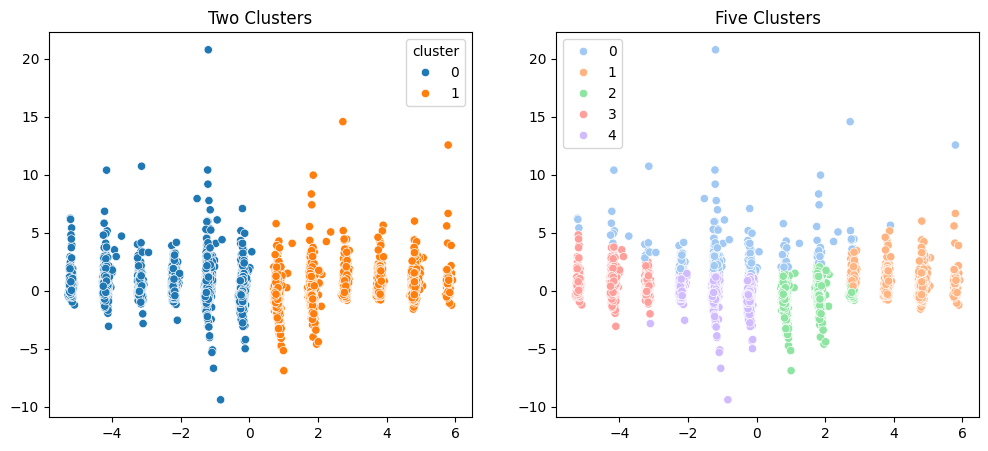

In [56]:
## visulaizing the clusters
kmeans5 = KMeans(n_clusters=5, random_state=42)
label5 = kmeans5.fit_predict(pca_data_train)

fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.scatterplot(x = pca_data_train[:,0], y=pca_data_train[:,1], hue = train['cluster'], ax=axes[0])
axes[0].set_title("Two Clusters")

sns.scatterplot(x = pca_data_train[:,0], y=pca_data_train[:,1], hue = label5, palette='pastel', ax=axes[1])
axes[1].set_title("Five Clusters")

Even though, the silhouette score is highest for cluster 5 the clustering is not quite meaningful as it is for 2 custers. Therefore n_clusters will be refit to 2.

In [57]:
train['cluster'].value_counts()

cluster
0    5066
1    3863
Name: count, dtype: int64

## Apply the labels to the original dataframe

In [58]:
cluster_df = pd.read_csv('data/bank_marketing.csv')
cluster_train = cluster_df.iloc[train.index,:]
cluster_train = cluster_train.drop(columns=['age','day','pdays'], axis=1)
cluster_train['cluster'] = train['cluster']
cluster_train

,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,deposit,cluster
3955,student,single,tertiary,no,5741,no,no,cellular,sep,1042,5,3,failure,yes,1
11150,management,married,secondary,no,355,no,no,cellular,aug,314,3,0,unknown,no,1
5173,unemployed,divorced,secondary,no,201,no,no,cellular,nov,594,1,1,success,yes,1
3017,entrepreneur,married,tertiary,no,1961,no,no,cellular,dec,351,1,0,unknown,yes,1
2910,management,married,tertiary,no,1624,no,no,cellular,nov,166,3,7,success,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,management,married,tertiary,no,761,yes,no,cellular,jul,80,2,0,unknown,no,1
5191,self-employed,single,tertiary,no,159,no,no,cellular,nov,449,2,4,success,yes,1
5390,technician,married,secondary,no,1144,no,no,cellular,aug,197,13,0,unknown,no,1
860,retired,married,tertiary,no,746,no,no,cellular,aug,372,5,0,unknown,yes,1


In [59]:
cluster_train['cluster'].value_counts()

cluster
0    5066
1    3863
Name: count, dtype: int64

## EDA on both the clusters

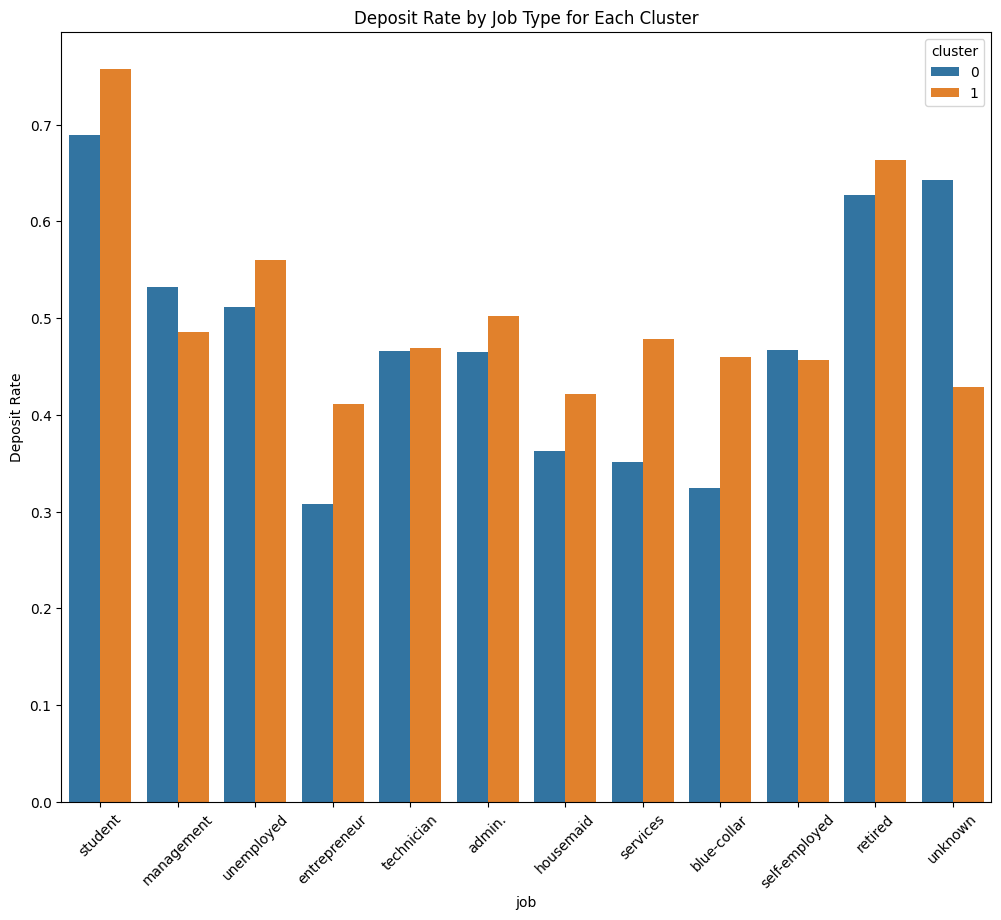

In [60]:
## Deposit Rate by Marital Status & Education

plt.figure(figsize=(12,10))
cluster_train['deposit'] = cluster_train['deposit'].replace({'yes':1, 'no':0})
sns.barplot(x='job', y='deposit', hue='cluster', data=cluster_train, ci=None)
plt.xticks(rotation=45)
plt.title("Deposit Rate by Job Type for Each Cluster")
plt.ylabel("Deposit Rate")
plt.show()


## Key Insights from Clustered Deposit Rates by Job Type  

- **Students in Cluster 1 have the highest deposit rate (~76%)**, showing strong interest in deposits.  
- **Retired individuals also have high deposit rates (~65-70%)** across both clusters, making them a key customer segment.  
- **Management professionals in Cluster 0 (~53%) have slightly higher deposit rates than in Cluster 1 (~50%)**.  
- **Entrepreneurs in Cluster 0 have a low deposit rate (~32%)**, but Cluster 1 shows improved engagement (~42%).  
- **Housemaids and blue-collar workers have the lowest deposit rates (~30-35%)** in both clusters, indicating lower financial product adoption.  
- **Self-employed individuals have moderate deposit rates (~45%)** in both clusters, similar to service and admin professionals.  

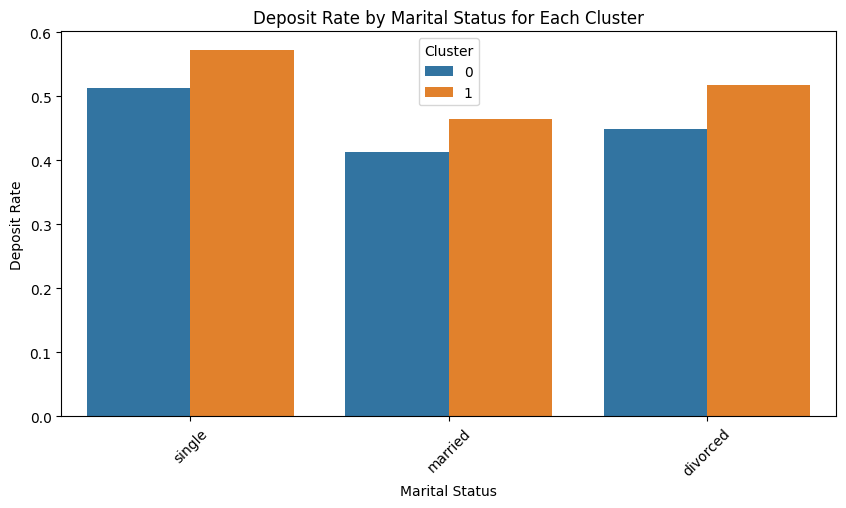

In [61]:
#Marital status vs Deposit rate
plt.figure(figsize=(10,5))
sns.barplot(x='marital', y='deposit', hue='cluster', data=cluster_train, ci=None, estimator=lambda x: sum(x)/len(x))

plt.title("Deposit Rate by Marital Status for Each Cluster")
plt.xlabel("Marital Status")
plt.ylabel("Deposit Rate")
plt.legend(title="Cluster")
plt.xticks(rotation=45)

plt.show()


## Key Insights from Clustered Deposit Rates by Marital Status  

- **Single individuals in Cluster 1 have the highest deposit rate (~58%)**, outperforming Cluster 0 (~52%).  
- **Married individuals in Cluster 1 (~47%)** show better engagement than those in Cluster 0 (~41%).  
- **Divorced individuals in Cluster 1 (~52%)** have a higher deposit rate than those in Cluster 0 (~45%).  

### Business Implications  
- **Single individuals in Cluster 1 show the highest engagement**, making them a prime target for financial products.  
- **Married individuals have lower deposit rates overall**, indicating a need for targeted financial incentives.  
- **Divorced individuals in Cluster 1 engage more actively**, presenting an opportunity for personalized offers.  

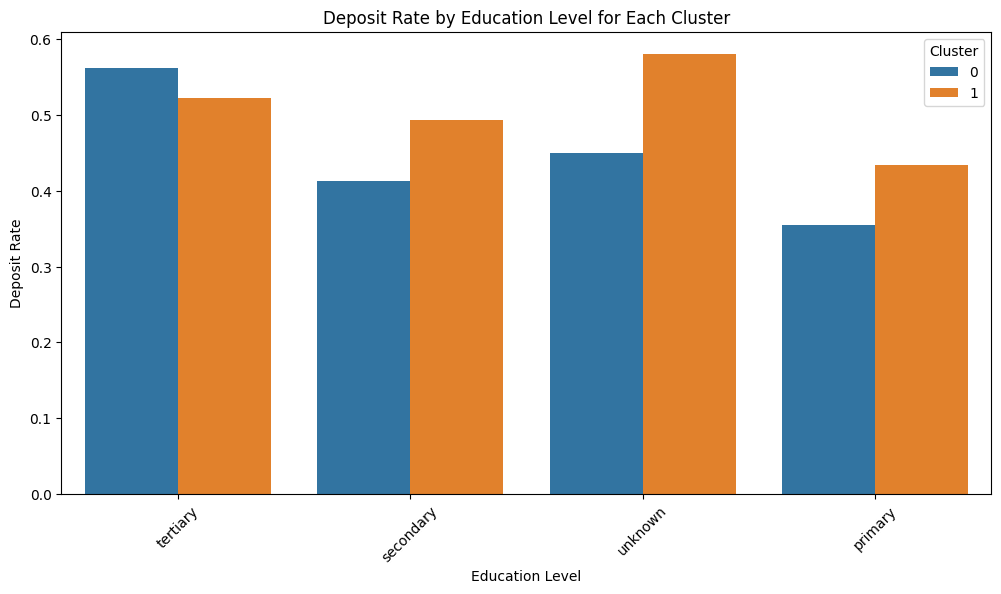

In [62]:
## Education vs deposit
plt.figure(figsize=(12,6))
sns.barplot(x='education', y='deposit', hue='cluster', data=cluster_train, ci=None, estimator=lambda x: sum(x)/len(x))
plt.xticks(rotation=45)
plt.title("Deposit Rate by Education Level for Each Cluster")
plt.xlabel("Education Level")
plt.ylabel("Deposit Rate")
plt.legend(title="Cluster")
plt.show()


## Key Insights from Clustered Deposit Rates by Education Level

- **Tertiary-educated individuals in Cluster 0 have the highest deposit rate (~56%)**, slightly higher than Cluster 1 (~52%).  
- **Secondary education holders in Cluster 1 show better engagement (~49%)** compared to Cluster 0 (~41%).  
- **Primary education holders in Cluster 1 (~43%)** have a higher deposit rate than those in Cluster 0 (~35%).  
- **Unknown education category in Cluster 1 has the highest deposit rate (~58%)**, significantly outperforming Cluster 0 (~45%).  

### Suggestions  
- **Tertiary-educated individuals are a strong target for financial products** due to their high deposit rates.  
- **Cluster 1 engages better across lower education levels**, suggesting potential for financial literacy initiatives.  
- **Unknown category's high deposit rate indicates an opportunity for further segmentation and targeted offers.**  


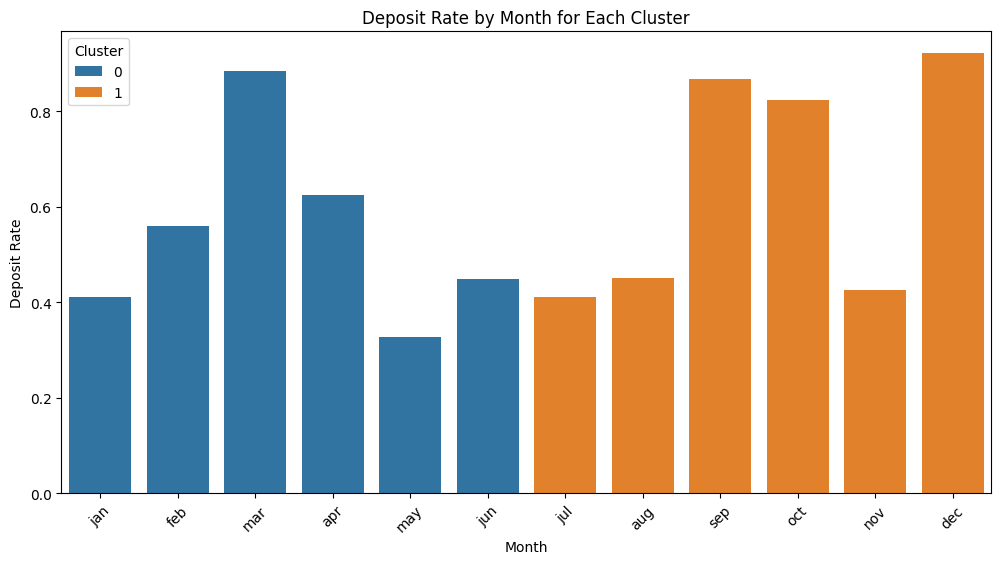

In [63]:
## month vs deposit
plt.figure(figsize=(12,6))
sns.barplot(x='month', y='deposit', hue='cluster', data=cluster_train, ci=None, estimator=lambda x: sum(x)/len(x), order=month_order)
plt.xticks(rotation=45)
plt.title("Deposit Rate by Month for Each Cluster")
plt.xlabel("Month")
plt.ylabel("Deposit Rate")
plt.legend(title="Cluster")
plt.show()

## Key Insights from Clustered Deposit Rates by Month  

- **December in Cluster 1 has the highest deposit rate (~90%)**, followed by September (~85%) and October (~82%).  
- **March in Cluster 0 shows the highest deposit rate (~88%)**, significantly outperforming other months.  
- **April (~63%) and February (~55%) in Cluster 0 also exhibit strong engagement.**  
- **May has the lowest deposit rate (~33%) in Cluster 0**, indicating weak deposit trends.  
- **August and November in Cluster 1 (~45%) have relatively lower deposit rates compared to peak months.**  
- **Deposits in Cluster 0 are concentrated in specific months (January, February, March, April, June, and May), while Cluster 1 dominates deposits in other months.**  
- **Cluster 1 experiences peak engagement in later months (September to December), whereas Cluster 0 is more active in the first half of the year.**  

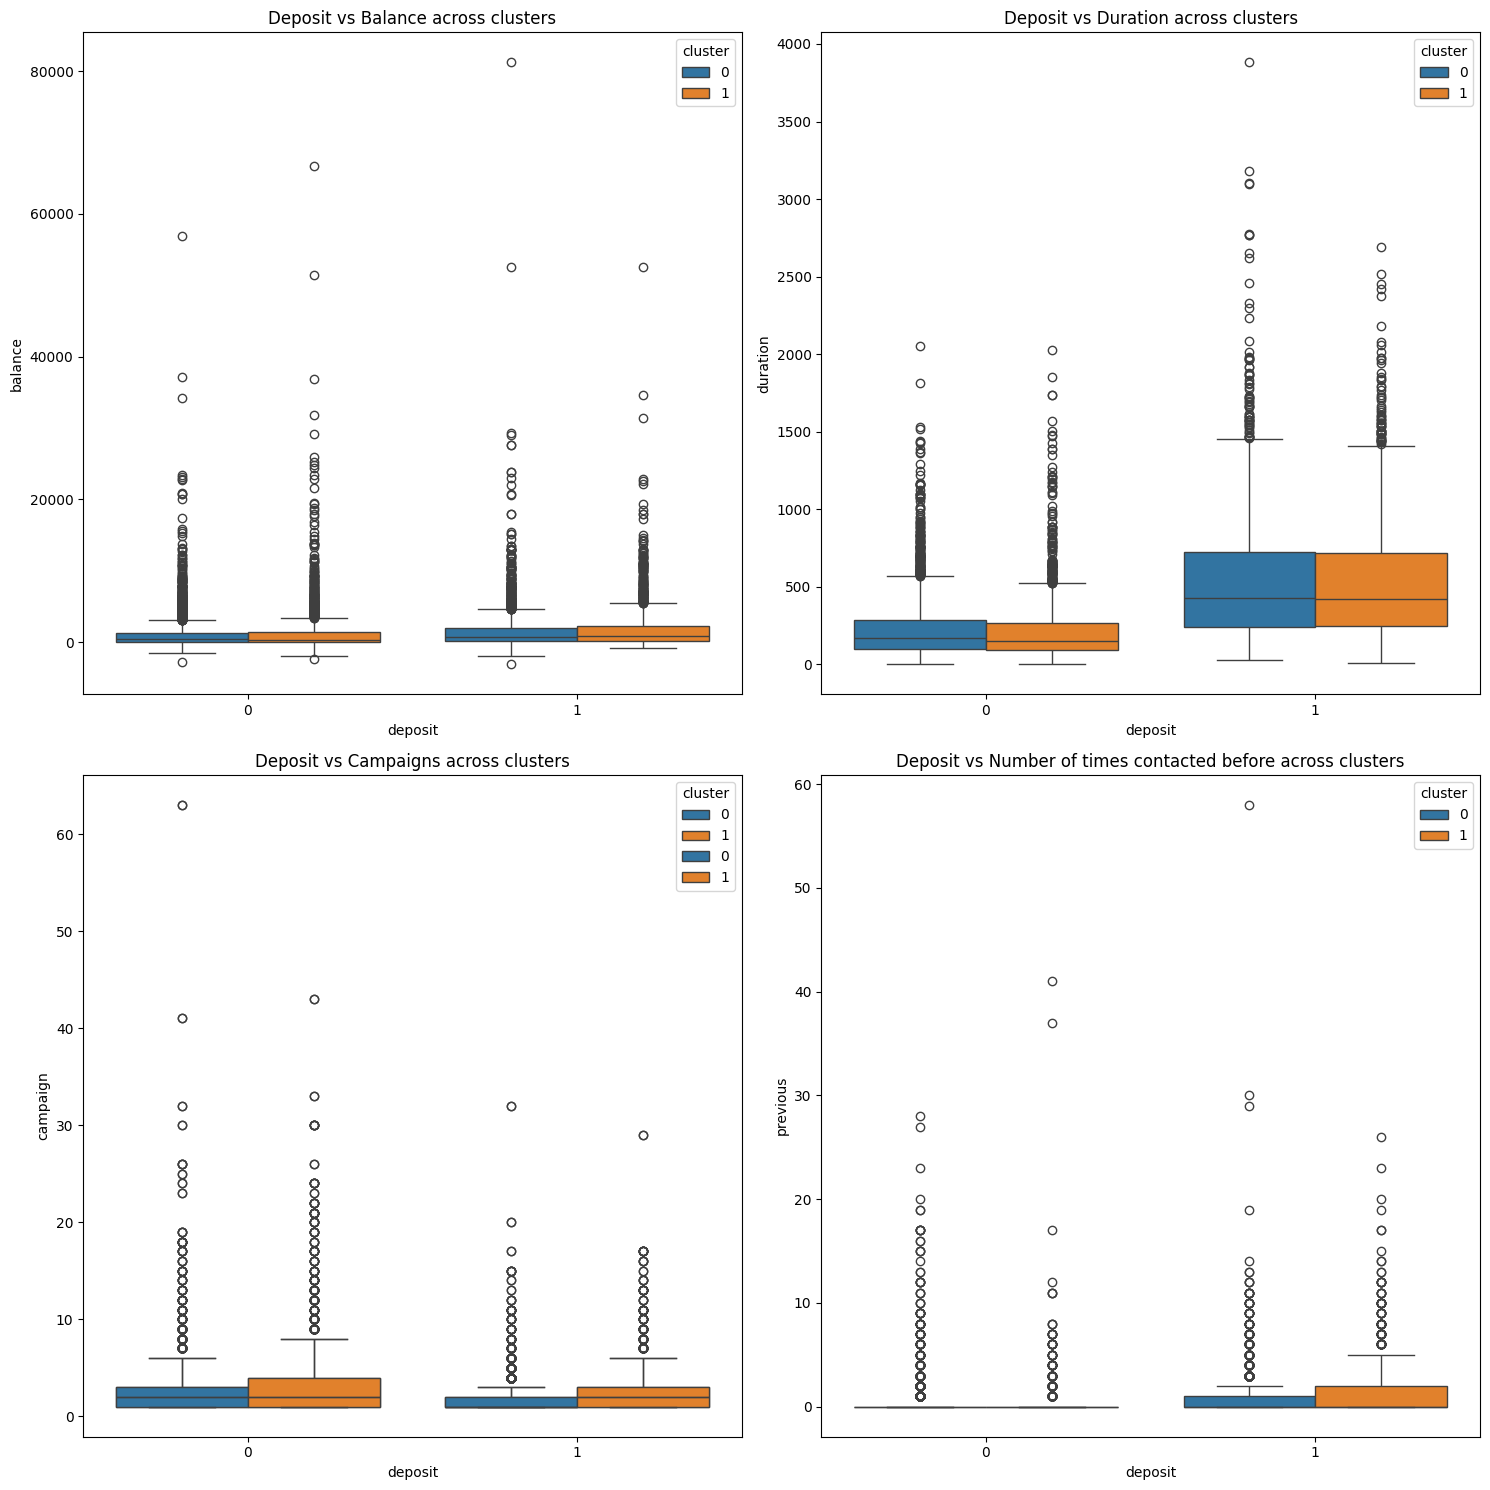

In [64]:
## Deposit Rate and Balance, Duration, Campaign and Previous contacts analysis

fig, axes = plt.subplots(2,2, figsize = (15,15))
sns.boxplot(data=cluster_train, x='deposit', y ='balance' , hue='cluster', ax=axes[0,0])
axes[0,0].set_title(f'Deposit vs Balance across clusters')

sns.boxplot(data=cluster_train, x='deposit', y = 'duration', hue = 'cluster', ax=axes[0,1])
axes[0,1].set_title(f'Deposit vs Duration across clusters')

sns.boxplot(data=cluster_train, x='deposit', y = 'campaign', hue = 'cluster', ax=axes[1,0])
axes[1,0].set_title(f'Deposit vs Campaigns across clusters')

sns.boxplot(data=cluster_train, x='deposit', y = 'campaign', hue = 'cluster', ax=axes[1,0])
axes[1,0].set_title(f'Deposit vs Campaigns across clusters')

sns.boxplot(data=cluster_train, x='deposit', y = 'previous', hue = 'cluster', ax=axes[1,1])
axes[1,1].set_title(f'Deposit vs Number of times contacted before across clusters')

plt.tight_layout()
plt.show()

## Insights from Deposit Behavior Across Clusters

### **1️. Deposit vs. Balance Across Clusters**
- **Cluster 0** has a **wider spread** of balance values, with a large number of outliers.
- **Cluster 1** shows a slightly **higher median balance** compared to Cluster 0.
- Both clusters have **many low-balance individuals** who did not make a deposit.
- **High-balance customers exist in both clusters**, but their deposit behavior is inconsistent.

---

### **2️. Deposit vs. Duration Across Clusters**
- **Call duration** has a strong impact on deposit behavior.
- Customers who **accepted deposits** (deposit=1) tend to have **longer call durations** in both clusters.
- **Cluster 1 has a higher median call duration** than Cluster 0.
- Shorter calls are associated with fewer deposits, **confirming the importance of longer engagement in marketing success**.

---

### **3️. Deposit vs. Number of Contacts in the Campaign (Campaign)**
- Most customers in both clusters were **contacted a few times**.
- A small fraction of customers was contacted **more than 10 times**, but they **rarely made deposits**.
- Cluster 1 seems to **have a slightly higher deposit rate** even at lower campaign counts.

---

### **4. Deposit vs. Previous Contacts**
- Customers who were **contacted more times previously** are slightly more likely to make a deposit.
- The **majority of deposits occur within a low number of previous contacts**.
- **Cluster 1 has a slightly higher median number of previous contacts**, indicating potential lead nurturing.

---

### **Key Takeaways**
**Longer call durations** significantly increase the likelihood of deposit acceptance.  
Excessive campaign contacts **do not necessarily improve deposit rates**.  
Previous contacts may have a **small positive impact** on deposit likelihood.  
**Higher balance customers exist in both clusters**, but deposits are still common among lower-balance customers.  

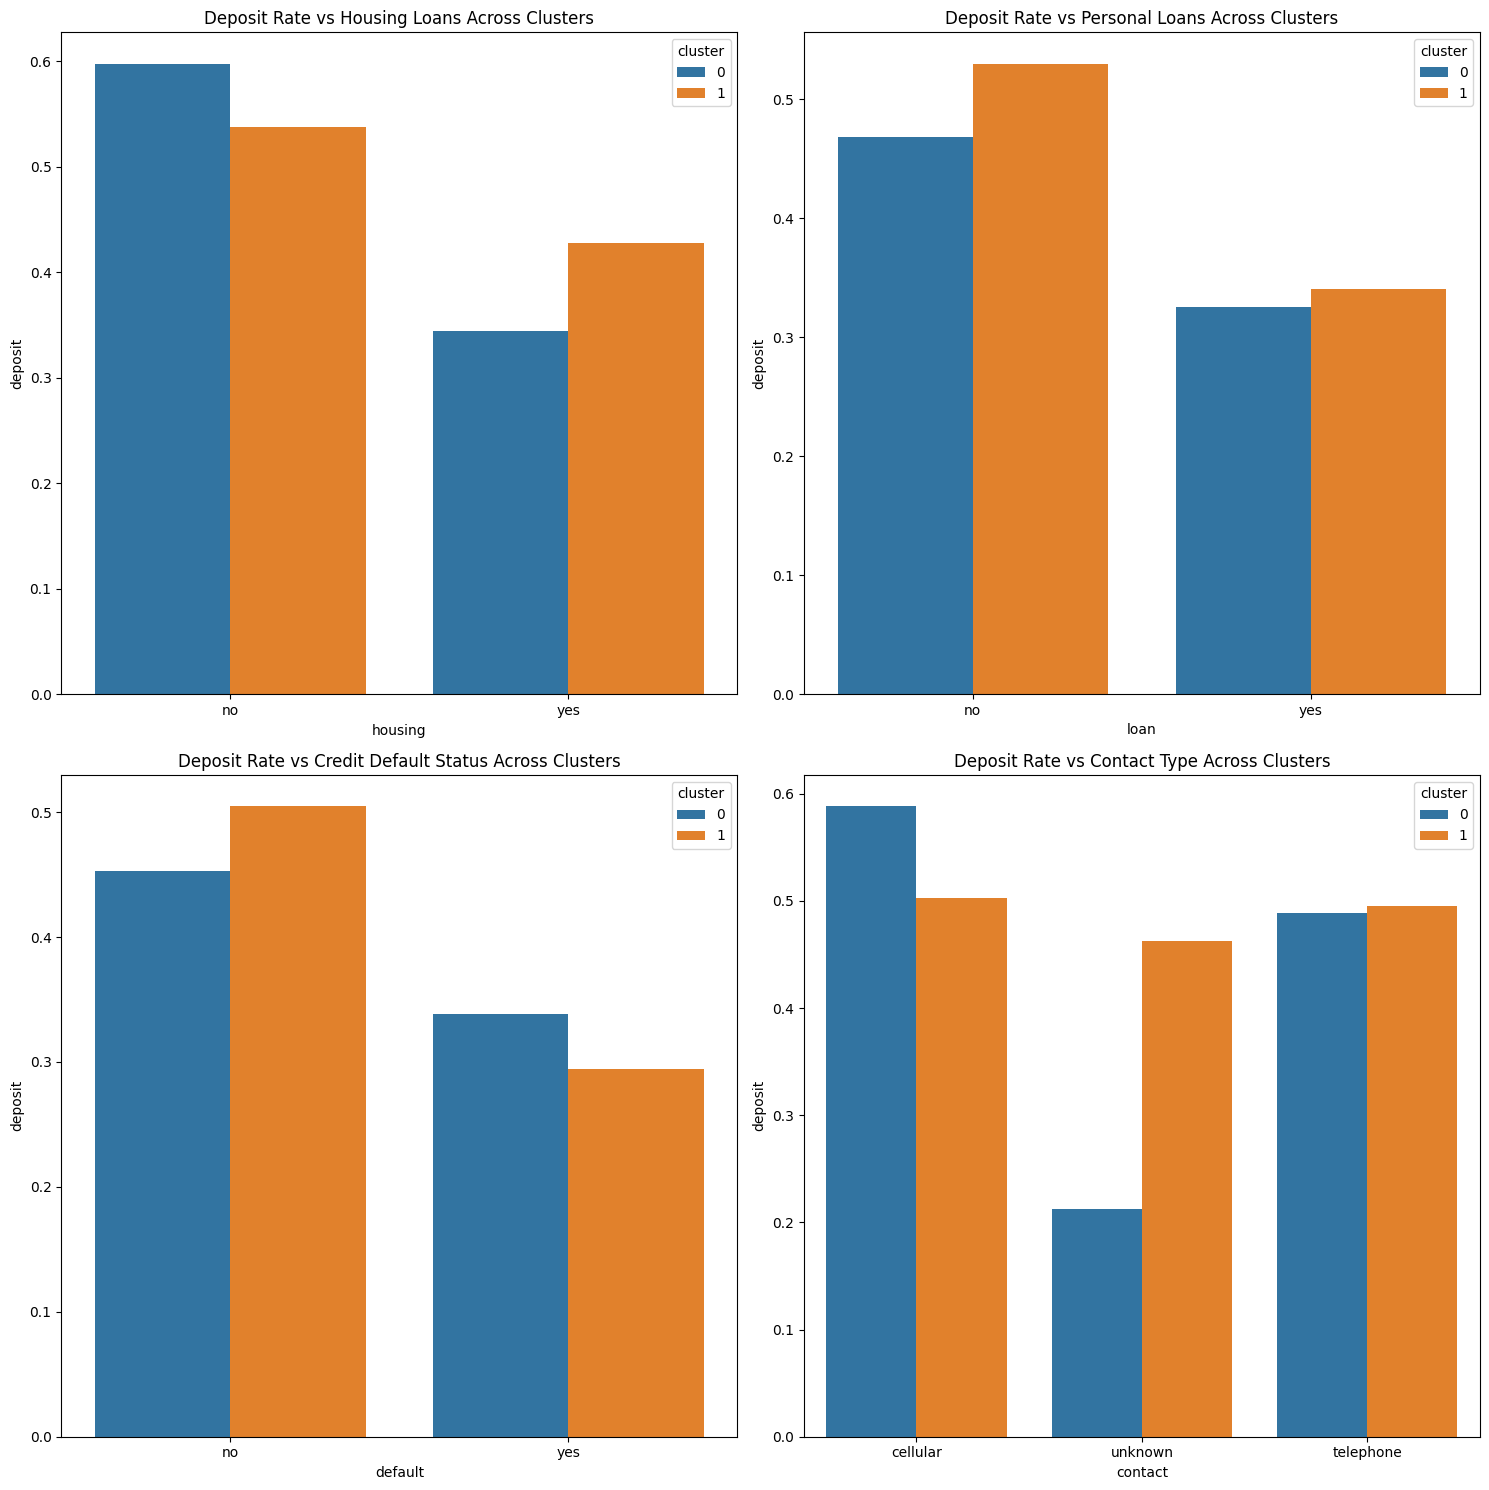

In [65]:
## Deposit Rate and Hoausing loan, Personal Loan, Credit Default Status and Contact Type analysis

fig, axes = plt.subplots(2,2, figsize = (15,15))
sns.barplot(data=cluster_train, x='housing', y='deposit', hue='cluster', ci = None, estimator=lambda x: sum(x)/len(x), ax=axes[0,0])
axes[0,0].set_title('Deposit Rate vs Housing Loans Across Clusters')

sns.barplot(data=cluster_train, x='loan', y='deposit', hue='cluster', ci = None, estimator=lambda x: sum(x)/len(x), ax=axes[0,1])
axes[0,1].set_title('Deposit Rate vs Personal Loans Across Clusters')

sns.barplot(data=cluster_train, x='default', y='deposit', hue='cluster', ci = None, estimator=lambda x: sum(x)/len(x), ax=axes[1,0])
axes[1,0].set_title('Deposit Rate vs Credit Default Status Across Clusters')

sns.barplot(data=cluster_train, x='contact', y='deposit', hue='cluster', ci = None, estimator=lambda x: sum(x)/len(x), ax=axes[1,1])
axes[1,1].set_title('Deposit Rate vs Contact Type Across Clusters')

plt.tight_layout()
plt.show()

# Insights from Deposit Rate Analysis Across Clusters

### **1. Deposit Rate vs Housing Loan**
- Customers **without housing loans** have a higher deposit rate compared to those **with housing loans**.
- The deposit rate is **higher for Cluster 0** than Cluster 1 among those without housing loans.
- The gap between deposit rates for people with and without housing loans is **more prominent in Cluster 0**.

### **2. Deposit Rate vs Personal Loan**
- Customers **without personal loans** are more likely to make a deposit.
- In Cluster 1, the deposit rate for those **without personal loans** is slightly higher than in Cluster 0.
- Customers who **have taken personal loans** have a **much lower deposit rate** compared to those without loans.

### **3. Deposit Rate vs Credit Default Status**
- Customers with **no credit default history** have a significantly **higher deposit rate** than those with defaults.
- The difference in deposit rates between **defaulters and non-defaulters is more evident in Cluster 0**.

### 4. **Deposit Rate vs Contact Type**
- **Cellular contact** results in the highest deposit rate, especially in Cluster 0.
- **Unknown contact methods** lead to the lowest deposit rate across both clusters.
- **Telephone contact** has a moderate deposit rate, with similar behavior across clusters.


In [68]:
## Cluster zero data insighst

cluster_train[cluster_train['cluster']==0].describe(include='all')

,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,deposit,cluster
count,5066,5066,5066,5066,5066.000000,5066,5066,5066,5066,5066.000000,5066.000000,5066.000000,5066,5066.000000,5066.0
unique,12,3,4,2,NaN,2,2,3,6,NaN,NaN,NaN,4,NaN,NaN
top,blue-collar,married,secondary,no,NaN,yes,no,cellular,may,NaN,NaN,NaN,unknown,NaN,NaN
freq,1090,2758,2592,5001,NaN,2925,4464,3031,2255,NaN,NaN,NaN,3786,NaN,NaN
mean,NaN,NaN,NaN,NaN,1441.653375,NaN,NaN,NaN,NaN,367.666601,2.281682,0.820963,NaN,0.451441,0.0
std,NaN,NaN,NaN,NaN,3007.924250,NaN,NaN,NaN,NaN,348.002193,2.426696,2.268833,NaN,0.497686,0.0
min,NaN,NaN,NaN,NaN,-3058.000000,NaN,NaN,NaN,NaN,3.000000,1.000000,0.000000,NaN,0.000000,0.0
25%,NaN,NaN,NaN,NaN,132.000000,NaN,NaN,NaN,NaN,140.000000,1.000000,0.000000,NaN,0.000000,0.0
50%,NaN,NaN,NaN,NaN,535.000000,NaN,NaN,NaN,NaN,251.000000,2.000000,0.000000,NaN,0.000000,0.0
75%,NaN,NaN,NaN,NaN,1612.000000,NaN,NaN,NaN,NaN,483.000000,3.000000,1.000000,NaN,1.000000,0.0


# Key Insights for Cluster 0

### 1. **Balance Distribution**
- The **average balance** is **$1,442**, but it varies widely with a **standard deviation of $3,008**.
- The **minimum balance** is **- $3,058**, indicating some customers are in overdraft.
- The **maximum balance** is **$81,204**, showing a significant gap between the lowest and highest balances.

### 2. **Call Duration and Campaign Impact**
- The **average call duration** is **368 seconds (about 6 minutes)**.
- The **longest call lasted 3,881 seconds (over an hour)**, showing that longer calls may have an impact.
- Most customers were contacted **1-3 times**, but one was contacted **63 times** in a single campaign.

### 3. **Previous Contacts Influence**
- **Majority (75%) of customers were never contacted before**.
- A few customers were contacted up to **58 times** previously.

### 4. **Deposit Rate**
- **Only 45% of customers made a deposit**, meaning **more than half declined**.
- Customers with **higher balances and longer call durations** seem more likely to make deposits.

### 5. **Cluster Uniformity**
- All customers in this dataset belong to **Cluster 0**, so there are no direct comparisons to another group.

### Suggestions:
- **Prioritize customers with balances above $1,612 for deposit campaigns.**
- **Ensure calls last longer than 483 seconds to increase deposits.**
- **Follow up with customers at least twice in a campaign for better results.**
- **Focus on customers who have been contacted before—they are more likely to deposit.**
- **Target customers without housing or personal loans for higher success rates.**
- **Prioritize reaching out via cellular over unknown contact methods.**

In [69]:
 
## Cluster one data insighst

cluster_train[cluster_train['cluster']==1].describe(include='all')

,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,deposit,cluster
count,3863,3863,3863,3863,3863.000000,3863,3863,3863,3863,3863.000000,3863.000000,3863.000000,3863,3863.000000,3863.0
unique,12,3,4,2,NaN,2,2,3,6,NaN,NaN,NaN,4,NaN,NaN
top,management,married,secondary,no,NaN,no,no,cellular,jul,NaN,NaN,NaN,unknown,NaN,NaN
freq,1050,2322,1770,3795,NaN,2582,3278,3432,1222,NaN,NaN,NaN,2903,NaN,NaN
mean,NaN,NaN,NaN,NaN,1623.915351,NaN,NaN,NaN,NaN,373.579084,2.801191,0.798602,NaN,0.500906,1.0
std,NaN,NaN,NaN,NaN,3292.040161,NaN,NaN,NaN,NaN,343.253915,3.006954,2.123657,NaN,0.500064,0.0
min,NaN,NaN,NaN,NaN,-2282.000000,NaN,NaN,NaN,NaN,2.000000,1.000000,0.000000,NaN,0.000000,1.0
25%,NaN,NaN,NaN,NaN,102.000000,NaN,NaN,NaN,NaN,136.500000,1.000000,0.000000,NaN,0.000000,1.0
50%,NaN,NaN,NaN,NaN,565.000000,NaN,NaN,NaN,NaN,256.000000,2.000000,0.000000,NaN,1.000000,1.0
75%,NaN,NaN,NaN,NaN,1857.000000,NaN,NaN,NaN,NaN,506.500000,3.000000,0.000000,NaN,1.000000,1.0


## Key Insights for Cluster 1 (Recommendations for Model Users)

- **Balance Analysis:**
  - The **mean balance is $1,623**, higher than Cluster 0.
  - **75% of customers have a balance below $1,857**, while the highest balance reaches **$66,653**.
  - **Recommendation:** Customers with balances **above $1,857** are more likely to deposit.

- **Call Duration Influence:**
  - **Mean call duration is 374 seconds**, slightly higher than Cluster 0.
  - **75% of customers have calls longer than 506 seconds**, with a max of **2,692 seconds**.
  - **Recommendation:** Customers who stay on calls for **longer durations (>506 seconds)** are more likely to deposit.

- **Campaign Effectiveness:**
  - The average number of campaign contacts is **~2.8**, with a max of **43**.
  - **Recommendation:** Customers contacted **2-3 times** tend to engage better. Avoid excessive calls beyond 5.

- **Previous Interactions:**
  - **Most customers had no prior interactions (median = 0), but some reached up to 41.**
  - This suggests that fresh leads dominate this cluster.
  - **Recommendation:** Prior contact history may not be a strong factor, but customers with **some prior interactions may show higher deposit likelihood**.

- **Deposit Probability:**
  - **50% of customers in this cluster made a deposit**, higher than Cluster 0.
  - **Recommendation:** Customers without personal or housing loans, contacted via cellular, and engaged in longer calls are more likely to deposit.

### Final Takeaway:
**Key predictors for deposits:** Long call duration, moderate campaign contacts, and balance above $1,857.  
**Target customers with >506 seconds call duration and avoid excessive follow-ups beyond 5 calls.**  
**Prioritize outreach via cellular and avoid customers with personal or housing loans for better conversion.**  

## Predicting the test set

In [162]:
## Shape of the reduced columns test data
pca_data_test.shape

(2233, 2)

In [166]:
## perdict clusters for test data
predict_labels = kmeans.predict(pca_data_test)
test['cluster'] = predict_labels

test['cluster'].value_counts()

cluster
0    1299
1     934
Name: count, dtype: int64

In [167]:
## Adding the labels to the original test data
cluster_df = pd.read_csv('data/bank_marketing.csv')
cluster_test = cluster_df.iloc[test.index,:]
cluster_test = cluster_test.drop(columns=['age','day','pdays'], axis=1)
cluster_test['cluster'] = test['cluster']
cluster_test

,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,deposit,cluster
5527,retired,divorced,secondary,no,744,no,no,cellular,jul,182,1,0,unknown,no,1
4541,blue-collar,married,secondary,no,1627,no,no,unknown,jun,1323,9,0,unknown,yes,0
1964,blue-collar,single,secondary,no,4963,yes,no,cellular,may,456,1,1,failure,yes,0
5007,blue-collar,married,secondary,no,8229,no,no,cellular,aug,784,2,0,unknown,yes,1
8928,technician,married,tertiary,no,1473,yes,no,unknown,may,84,3,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,unemployed,married,secondary,no,926,no,no,cellular,jul,385,5,0,unknown,yes,1
5544,technician,married,primary,no,230,yes,no,unknown,may,96,1,0,unknown,no,0
10749,technician,married,tertiary,no,431,yes,no,cellular,may,55,1,1,failure,no,0
3881,unemployed,married,secondary,no,926,no,no,cellular,aug,504,2,10,success,yes,1


<Axes: >

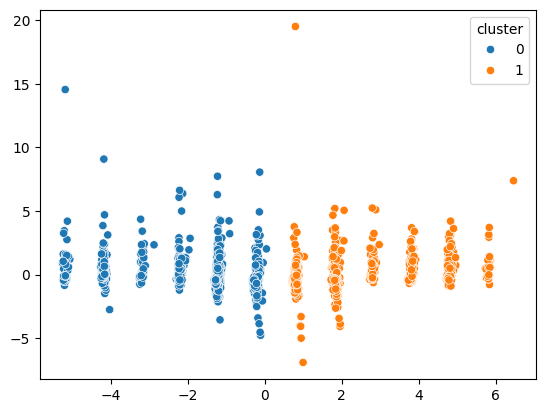

In [168]:
##Visulaize the clustering of test data
sns.scatterplot(x = pca_data_test[:,0], y=pca_data_test[:,1], hue = test['cluster'])

The test data is clustered well and their is a clear separation between the clusters

## Prediction

In [176]:
input_data = {
    'balance': 1500,
    'duration': 300,
    'campaign': 2,
    'previous': 1,
    'job': 'admin.',
    'marital': 'married',
    'education': 'tertiary',
    'default': 'no',
    'housing': 'yes',
    'loan': 'no',
    'contact': 'cellular',
    'poutcome': 'success',
    'month': 'may',
    'deposit': 'yes'
}


input_df = pd.DataFrame([input_data])
input_df

,balance,duration,campaign,previous,job,marital,education,default,housing,loan,contact,poutcome,month,deposit
0,1500,300,2,1,admin.,married,tertiary,no,yes,no,cellular,success,may,yes


In [184]:
## Preprocessing the input features

cat_cols = [col for col in input_df.columns if input_df[col].dtype == 'O' and col not in (['month'])]
num_cols = [col for col in input_df.columns if col not in cat_cols and col not in (['month'])]

scaled_data = preprocessor.transform(input_df)
column_names = (num_cols + list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_cols))+['month'])
scaled_df = pd.DataFrame(scaled_data, columns=column_names)
scaled_df = scaled_df[significant_features]
scaled_df = pca.transform(scaled_df)
scaled_df

array([[-1.20366391,  0.50228119]])

In [186]:
prediction = kmeans.predict(scaled_df)

if prediction == 0:
    print('The customer belongs to Cluster 0' )

else:
    print('The customer belongs to Cluster 1' )

The customer belongs to Cluster 0


In [190]:
## Lets fit the model to the entire dataset
cat_cols = [col for col in df.columns if df[col].dtype == 'O' and col not in (['month'])]
num_cols = [col for col in df.columns if col not in cat_cols and col not in (['month'])]

scaled_data = preprocessor.transform(df)
column_names = (num_cols + list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_cols))+['month'])
scaled_df = pd.DataFrame(scaled_data, columns=column_names)
scaled_df = scaled_df[significant_features]
scaled_df = pca.transform(scaled_df)
scaled_df

final_labels = kmeans.fit_predict(scaled_df)
df['cluster'] = final_labels
df

,balance,duration,campaign,previous,job,marital,education,default,housing,loan,contact,poutcome,month,deposit,cluster
0,2343,1042,1,0,admin.,married,secondary,no,yes,no,unknown,unknown,may,yes,0
1,45,1467,1,0,admin.,married,secondary,no,no,no,unknown,unknown,may,yes,0
2,1270,1389,1,0,technician,married,secondary,no,yes,no,unknown,unknown,may,yes,0
3,2476,579,1,0,services,married,secondary,no,yes,no,unknown,unknown,may,yes,0
4,184,673,2,0,admin.,married,tertiary,no,no,no,unknown,unknown,may,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1,257,1,0,blue-collar,single,primary,no,yes,no,cellular,unknown,apr,no,0
11158,733,83,4,0,services,married,secondary,no,no,no,unknown,unknown,jun,no,0
11159,29,156,2,0,technician,single,secondary,no,no,no,cellular,unknown,aug,no,1
11160,0,9,2,5,technician,married,secondary,no,no,yes,cellular,failure,may,no,0


In [192]:
## Check the balance of the dataset
df['cluster'].value_counts(normalize=True) *100

cluster
0    57.023831
1    42.976169
Name: proportion, dtype: float64

The dataset is almost perfectly balanced with cluster 0 contributing 57% of the dataset. This shows that the model is not extremely biased toward one of the clusters unlike the Agglomerative clustering model